# Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

=A2*0.01+0.1*B2+C2*5+5+RAND()*5, the real parameters is 0.01, 0.1 ,and 5

# Read the synthetic data

In [2]:
dataku = pd.read_excel("sintetik_multivariate_linear.xlsx")
dataku.head()

,persons,luas,lantai,penghasilan
0,3,136.994056,1,24.600170
1,9,135.662726,2,30.988891
2,9,178.110998,2,37.616252
3,4,133.341815,1,24.327517
4,6,181.834450,1,30.925219


In [3]:
dataku.describe()

,persons,luas,lantai,penghasilan
count,66.000000,66.000000,66.000000,66.000000
mean,6.500000,152.013876,1.500000,30.293230
std,2.931264,27.877658,0.503831,4.208545
min,2.000000,101.351891,1.000000,22.980964
25%,4.000000,131.786413,1.000000,26.720207
50%,6.000000,153.585054,1.500000,30.132579
75%,9.000000,172.041474,2.000000,33.077566
max,11.000000,199.872623,2.000000,38.820191


# Spliting and Scaling Data

## Split data to feature and target

In [4]:
X = np.array(dataku.drop("penghasilan",axis=1))
Y = np.array(dataku[["penghasilan"]])

In [5]:
print(X.shape)
print(Y.shape)

(66, 3)
(66, 1)


## Scaling data into mean normalization

In [6]:
x_mean = X.mean(axis=0)
y_mean = Y.mean()

x_range = X.max(axis=0)-X.min(axis=0)
y_range = Y.max(axis=0)-Y.min(axis=0)

X = (X-x_mean)/x_range
Y = (Y-y_mean)/y_range

In [7]:
print(X[:4])
print(Y[:4])

[[-0.38888889 -0.1524534  -0.5       ]
 [ 0.27777778 -0.16596659  0.5       ]
 [ 0.27777778  0.26488964  0.5       ]
 [-0.27777778 -0.18952419 -0.5       ]]
[[-0.35942796]
 [ 0.04392008]
 [ 0.46233453]
 [-0.37664175]]


## Add column 1 for Theta Zero

In [8]:

X = np.c_[X,np.zeros((66,1))+1]

In [9]:
x_shape = X.shape
y_shape = Y.shape
print(x_shape)
print(y_shape)

(66, 4)
(66, 1)


## Initialize the paramaters

In [10]:
np.random.seed(69)
w = np.random.randn(x_shape[1],1)

print(w,w.shape)

[[ 0.9155071 ]
 [-0.60354197]
 [ 1.16229517]
 [-0.60140014]] (4, 1)


In [11]:
h = np.dot(X,w) 
print(h[:5],h.shape)

[[-1.44656623]
 [ 0.33422278]
 [ 0.07418296]
 [-1.32246945]
 [-1.41609126]] (66, 1)


# Learning Algorithm (Initialize + "Vanila" Gradient Descent)

In [12]:
np.random.seed(1)
w = np.random.rand(x_shape[1],1)
J0 = []

In [13]:
import time
tic = time.time()
h = np.dot(X,w) 
err = h-Y
J = (err**2).mean()/2
iterasions = 10**4
learning_rate = 0.0001

for i in range(iterasions):
    dw = (err*X).mean()
    w = w - learning_rate*dw
    
    h = np.dot(X,w) 
    
    err = ((h-Y))
    
    J = (err**2).mean()/2
    
    J0.append(J)

toc = time.time()
      


In [17]:
print(J)

0.048654577307807895


In [15]:
w

array([[ 0.36159389],
       [ 0.66489638],
       [-0.05531374],
       [ 0.24690446]])

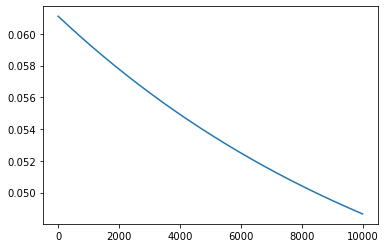

In [18]:
plt.plot(J0)

In [16]:
print("Time for ",iterasions," and ",learning_rate," : ",toc-tic)
print("Cost Function :",J)

Time for  10000  and  0.0001  :  0.0019981861114501953
Cost Function : 0.06110203625321074


# Minibatch Stochastic Gradient Descent

In [19]:
gacha = np.random.choice(x_shape[0],size = int(x_shape[0]/2))
Xm = X[gacha,:]
Ym = Y[gacha,:]

In [20]:
np.random.seed(1)
w2 = np.random.randn(x_shape[1],1)
J1 = []

In [21]:
import time
tic = time.time()
h2 = np.dot(Xm,w2) 
err = h2-Ym
J = (err**2).mean()/2
iterasions = 10**5
learning_rate = 0.01

for i in range(iterasions):
    gacha = np.random.choice(x_shape[0],size = int(x_shape[0]/2))
    Xm = X[gacha,:]
    Ym = Y[gacha,:]
    
    dw2 = (err*Xm).mean()
    w2 = w2 - learning_rate*dw2
    
    h2 = np.dot(Xm,w2) 
    
    err = ((h2-Ym))
    
    J = (err**2).mean()/2
    J1.append(J)
   
    
            

toc = time.time()
      


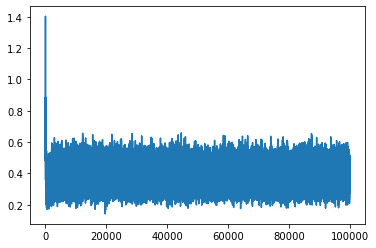

In [22]:
plt.plot(J1)

In [24]:

h2 = np.dot(X,w2) 
err = h2-Y
J = (err**2).mean()/2
J

0.3852487402128859

# Stochastic Gradient Descent

In [25]:
np.random.seed(1)
w3 = np.random.randn(x_shape[1],1)
J2= []

In [34]:
import time
tic = time.time()
h3 = np.dot(X,w3) 
err = h3-Y
J = (err**2).mean()/2
iterasions = 100000
learning_rate = 0.01

for i in range(iterasions):
    gacha = np.random.choice(x_shape[0],size = 1)
    Xm = X[gacha,:]
    Ym = Y[gacha,:]
    
    dw3 = (err*Xm).mean()
    w3 = w3 - learning_rate*dw3
    
    h3 = np.dot(Xm,w3) 
    
    err = ((h3-Ym))
    
    J = (err**2).mean()/2
    J2.append(J)
    print(J)
            

toc = time.time()
      


0.886267626722742
0.0005100387816780043
0.3596367219312007
0.268053453352255
0.6659133144890327
0.18388323101915582
0.05091543297498053
0.03271752900674208
0.614613921615856
0.015723570666890084
0.053694249446255865
0.0038683045010355554
0.4404833097625078
0.05337360985448848
0.3594360198612126
0.06621930252200124
0.14015643862950022
0.3915382915107501
0.09735050791531859
0.5332661985201398
0.8521316508311334
0.4714216413673212
0.5249052912918989
0.22839246823755413
0.1360597506299036
0.11747978210446174
0.23027645861950974
0.04888877443291493
0.25778112447753704
0.49224314582153866
0.049488357919463946
0.22730974322378597
0.9463938205496459
0.032264778778374824
0.5333671863702661
0.9457186120365864
0.067639763729567
0.3908614398816083
0.4251012403606913
0.03203502924210936
0.9564597307162114
0.39044460396276465
0.031969003287780524
0.03195972194876269
0.039845787772101994
0.6856756852977611
0.12015960203270076
0.08915397672589774
0.17128373526019783
0.01886957078000782
0.0691402731144

0.03770509228084705
0.8713688315451971
0.0981133732619956
0.12674396520302253
0.19896822529648112
0.039512178263684736
0.10892466334998763
0.25452590991002305
0.19752036882913582
0.8863515124502562
0.6822848819770047
0.041456036644685744
0.6311451283353186
0.0003061181314571847
0.053543304090945223
0.7442175247843846
0.370654303200599
0.21780924254827308
0.18026355687820336
0.04219371470757006
0.8256581122149925
0.26277569477467366
0.05614624124425767
0.872830235656727
0.03415051234048049
1.186413728086908
0.14236097269983486
0.8282396543186724
0.175951086800873
0.5793252306290197
0.7483269211607011
0.1241296629066224
0.38647820439593455
0.37908964448412313
0.1043794432664231
0.8265956967461228
1.011912868729357
0.0024144886214085546
0.654001329581903
0.14227599025276993
0.611466117747071
0.48927306925159986
0.2748542529114961
0.03448120409015727
0.014875440821134334
0.7193310575022536
1.009606522308015
1.1936725889697872
0.3837602149016589
0.2319850528898276
0.3760614195857055
0.00371

0.00023209049066459636
0.052203102216801
0.5786583168846403
0.7713450828374536
0.04767148036678161
0.583525680091667
0.1796909481876714
0.1736048044614177
0.05060088667304534
0.5775851565817666
0.04702423664900378
0.1503187888088772
0.1420370564331708
0.035769455624964704
0.6672724536918592
0.000584790688275282
0.0633054294492848
1.0923990995731188
0.7944031188885865
0.0924834850704854
0.26946517829361144
0.6704221068100052
0.3078551851746454
0.6423636979626621
1.049256604210892
0.004011757176275632
0.10664746616236033
0.11585372948235594
0.3305526192839492
0.7184243029396647
0.582277860692181
0.04515892024505669
0.6169142446846878
0.7617893241946078
0.10762342627995425
0.038890891252238165
0.15249574361594598
0.3752356377170976
0.000878298805180701
0.16082700945748765
0.4035291253166341
0.3765161862603227
0.10193208445115891
0.05164641506611664
0.0007876941140976178
0.5833983575845343
0.4031591829223598
0.4235889018962411
0.3250564582071132
1.0389081252634147
0.044331324459114536
0.06

0.05009634254222279
4.127815864473066e-07
0.3739115894562392
0.05007910748827104
0.8565218895313594
0.43644335003067314
0.37414879350053093
0.047357519962075406
0.38755584762383594
0.1804418883392861
0.7065803439191596
0.3571032452787818
1.3830783293348033e-05
0.2691148187097623
0.17635901867519285
0.05189236161352117
0.5950744365855918
0.04616375616628595
8.056410143986726e-06
0.3957045965476782
0.8330810848956639
0.8696324583574823
1.1566154649369167
0.16275780766306147
0.36005656962126587
0.15670447598732326
1.886041691822951e-05
0.8109166224674765
0.6532970372073865
0.19703935487924726
0.0024288932807680907
0.3256342688842321
0.11381514338168204
0.8595498600598755
0.8589596990218811
0.09312704960398295
1.0693388980631235
0.7640049601481164
0.2749063758945819
0.5389149961238742
0.32260616289503286
0.0054614011706733126
0.5865155175872986
0.0012620145975814636
0.4014420113818102
0.41218472765498526
0.0036823936459881934
0.15209789745507105
0.5829887966736083
0.8459336498377436
0.0390

0.8690911008019094
0.046309754404168534
0.04821626194150023
0.2689834589225705
0.10591771073823071
0.22426193577445316
0.03491839539676681
0.845228724570233
0.8849434163804096
0.4718313423689594
0.4956794827186125
4.3085839868750276e-05
0.7160344438141188
0.5788047700065808
0.8374629477697586
0.7033563452528978
1.266788064653833
0.1589806482356881
0.37451071838845634
0.3696617432805052
0.04685708544312874
0.2242613103871451
0.7055332177677904
0.060213410445618
0.39017494769768757
0.17934162836102316
1.0086152633083598
0.2695470917366372
0.03460255200940085
0.0024497511072332006
0.20192258829433943
0.27594118462649175
0.6525526755760829
0.381333935572936
0.7370443769766848
0.0001562100779745165
0.04206988097320521
0.10134697196954182
6.426393469838173e-05
0.00937385411898382
0.645907563876333
0.36874344998496167
0.252542143677614
9.578885620397245e-05
0.8494192090059148
0.01186652867462273
0.19221739176301236
0.6382775191131859
0.05251845636878659
0.01980606305307746
0.04068081830725921

0.9095252447940575
0.8810739174176069
0.042381856060238296
0.4890583223820923
0.5843218963723608
0.47232283219172866
0.527993863585253
0.039343169732681746
0.3838331543754201
0.38302302603780597
1.03804664323232
0.06674014807581863
0.3939381207280382
0.3897444631527035
0.03192001059698089
0.1431380797852729
0.7375742409760938
0.23659024253807578
1.4354635395960538
0.38018027553926337
0.569435436012232
0.13194141076084895
0.5637490948055889
0.130175530937709
0.7268951275473263
0.20209086275145652
0.3129565816182158
1.37189774411601
0.2341107908384917
0.00392130817574386
0.04603084363597974
0.0020061249977360095
0.022660767813802118
0.02289979146994494
0.0037537126548815238
1.346607410732024
0.035455807934399654
0.0008653392419535425
0.8226302958357308
0.2554857430295974
0.4501085111921824
0.03996481132608385
0.38877691936675357
0.09494839858884407
0.4406131860688365
0.13642188816732603
0.6249718675673127
0.26748998132373153
0.24562871092475808
0.0443218007837421
0.12701448346975128
0.24

0.6245557417159852
0.9212060143334528
1.0230913971288167
0.5179719462008792
0.0013590988538504445
0.0036812434073755043
0.09806742918006675
0.8478777062690671
0.09936530508435289
0.26976674308266924
0.00486743697072556
0.15661306698212296
0.14414456903511083
0.08519468231659935
0.7396833463262502
0.13420921039939418
0.7211720315808117
0.28448529571664316
0.03863681786292662
0.9529999670589829
0.46275118625693235
0.3055020883748129
0.08757492575112374
0.15002654575393817
6.820847481417968e-05
0.33680126363252794
0.4074447312446016
0.11159719761780297
0.27045809728246656
1.265276332398843
0.11122045384766789
0.06787718921027208
0.3120789357115469
0.126942351051503
0.043113244278247365
0.8432972000756949
0.5291621903573654
0.35479600153626195
0.350144412137872
0.6003741450252582
0.8430890247953808
0.972019388764653
0.054391522300496535
0.0432858717592241
0.35156113295293445
0.043189631854048074
0.08180446104835346
0.040176482217749096
2.985325240108088e-05
0.8432600884496487
0.05463463864

0.5355116900487249
0.27848072262997003
0.6422745658936025
0.38276686900256607
0.23355212654221735
0.007507398456548479
0.12926059189583114
0.052780864416240386
0.226129682040831
0.1292163025643426
0.5936419080362015
0.9085574104624428
0.5151205202150065
0.27597346896459707
1.0792543010147082
0.31596120971772446
0.00973854653635594
0.5759266668546571
0.2907489415943287
1.0438182299353813
0.49262366248648937
1.4074779449385812
0.0780085605570236
0.3464580561732131
0.026746668712419916
0.2672121172616901
0.032992147577977776
0.630463689716238
0.32701997133197547
0.043413094276153336
0.2517244691600083
0.00046407028946955056
0.1431000516754016
0.25088463725992033
0.22072308572132152
0.3027418247817619
0.007093957848698917
0.0070011693040840095
0.15354034256158702
0.9947628830333146
0.2514039068874538
0.9333667873556416
0.004345092128993376
0.5661428941772542
0.12038358796209671
0.8532491901712588
0.1430191453361624
0.3871485339044824
0.9218951711438996
0.538749496177559
0.03072427239222657

0.40262450060702165
0.887954618758431
0.040949262407783536
0.3603988361435215
0.15837737596272167
0.2684369769144889
0.4018897040504276
0.04814041855425562
1.2219952854606455
1.1959095488723668
0.3950932096326543
0.4294542922851753
1.2671981002133506
0.0005889313534180196
0.0017655128534936524
0.900160293398434
0.6838950061677858
5.439094513118808e-05
0.0019732699122205033
0.39181546780845444
0.0002939218730342358
0.010263922531312145
1.2671113140526544
0.36191084833770537
0.03366093167231381
0.3505496524635712
1.0116707126011688
0.6527081431866
0.001588545342998391
0.7854500481578423
0.26320420274888123
0.5327243054885019
0.0008765060793337086
0.2705906836944909
1.0029999217752334
0.6118150030850015
0.24041659240320873
1.012684747115544
1.277762507686324
0.6991778114556031
0.0011131705002023246
0.02917367248950514
0.06488402630482332
0.1836552079011615
0.355807443023887
0.013128925504036148
0.04919851423968661
0.8628658341552299
0.003821483449034859
0.4040409979219409
0.05214576397621

0.3422538055297114
0.20179370718784545
0.22676629104440377
0.054751571081565115
0.193286960696119
0.26892263655122217
5.760755428943403e-05
0.37368888967525926
0.5786750096246565
0.6063734703221407
0.04569385410174411
0.22739631985569814
0.832248610517782
0.26805742612798517
0.8375216060833076
0.0483696711324035
0.22027422437607014
1.0143408787643575
0.8690524249655266
0.36788299537764335
0.0591236662364268
0.038971508264167544
0.8714773236402463
0.6673928464049093
1.0092032783375742
0.043581202756542564
0.12062815513975013
0.034527151264081075
9.572689152307016e-05
0.6083601001117441
0.7146951201567735
0.3976037572574524
0.2689564079234185
0.04844273170339851
0.11678374045970638
0.10011469520634063
0.5783421674825961
0.03865465739108336
0.0054703604087773
0.2689339816681051
0.15248299148831862
0.8315047203652791
0.5852332369416574
0.5852077383554054
0.8837391374736561
0.03481559176400457
0.04662029509640668
1.144311822318087
0.7633031730532225
0.06168052978905068
0.004243785119360808


0.11238495776896586
0.0334167821790937
0.6437909881018292
0.8652055759642016
0.23661853811929248
0.09436130241881006
1.0121929281400381
0.484742174590033
0.44804480568130933
0.860828700735421
0.050928095287522755
0.24089460407407104
0.049848408747720785
0.03289744951589754
0.1323579284761108
0.8595156768462534
0.41937139993292655
1.0130606649643614
0.22375486113129453
0.9441435358303488
0.3905849141049136
1.307314619233652
0.00179466494979979
0.7056739411241799
0.39071282380840006
1.2677804543905387
1.3327832774808477
0.89838161169888
0.12541634083601932
0.5183491289514879
0.9253379537662909
0.024952763966629814
0.43194549087120293
0.14274588161171928
0.43525510886108515
0.14163067997552306
0.01864262623389031
0.048286253298242314
0.13875455571863102
0.4329760029265109
0.0011300395579103323
0.0010665193038667626
0.039846940394363324
0.02338789068929996
0.590222935968944
0.04671748552629987
0.5337220437105976
0.3149022396702164
0.0024516486653870834
0.03565905548704115
1.267986074401726

0.043657943579147075
0.516089498373
0.11895571184733471
0.050985431992142075
0.005509158827920151
0.005437099359764609
0.4510660388363992
0.2672523038781597
0.45374847221729075
0.040116711610993214
0.143047841605526
0.11671388390882065
1.3937174953236642
1.0044051876196878
0.2147157855168858
0.000770522861021023
0.004011413634872386
0.5913651787268024
0.2193035124783906
0.4567822795200353
0.13603312397884632
0.7141416219425061
0.12646022437428403
0.7051616680210463
0.9932046536008089
0.36993860728458117
0.03313900974115277
0.14287432482900625
0.9751399284075267
0.03997902468667743
0.3695139446198445
1.3229639763667989
0.056619520489908495
0.055071456425040195
0.0476589996048225
0.8506806794626167
0.26766719094658925
0.5735247936021741
0.21245696603355707
0.003952471760940994
0.5216514090214096
1.3161115277479079
0.2561610623658886
0.1428171263263976
0.9733683903449162
0.04654453847558289
0.6217450386781374
0.035834096587964784
0.03990769601966579
0.34396796850737016
0.8520268082134903


0.26955513745040094
0.09166951095200841
0.9052055891148424
0.37129012231120573
0.06500851520573725
0.14416307360833103
0.6655738609213434
0.7774997775347952
1.037010901530427
0.08723421164281225
0.1552134208896629
1.0043889555400816
0.04416772103353865
0.0015480107210264949
0.844711399228946
1.047036051381246
1.0052126824811995
0.21031578687196287
0.048063478576435746
1.0651138354487917
0.639054308708401
0.049985713487926235
0.13707322501036384
0.0013939192593171862
0.33915965044354357
0.10697863465143162
0.005659343687655086
0.845396140325095
1.0730007870944667
0.04751094293903548
0.2736830933836676
0.24320615050478905
0.24010652111656983
0.14195388571878903
0.6468498999259737
1.0654533304685752
0.0035890970694753346
1.063579229511205
0.15423314526716206
0.7295973831249897
0.7357331117654251
0.32055909774784125
0.10698555933575624
0.05018152696824216
0.001253811487499394
0.11648367509878133
0.4312135358271971
0.5303495937417159
0.5870920868647167
1.0054107760695794
0.0914418823393223


0.5779875041996104
0.8470664071333889
0.11533979925343936
0.00020500025658063578
0.0002409421466150958
1.1201113053960543
0.8007268884484073
0.40075563565758954
0.03201882744274902
0.8604090498048486
0.6471458176400725
0.003132709126581661
0.10772666729852821
0.11452928254721623
1.266188179617319
0.14190064658606383
1.0220581095374637
0.26948731366075734
1.0218587692802856
0.06468772381024271
1.2662669944817884
0.5190004577046442
0.5836783966530454
0.0003477739737754351
0.05259163647001576
0.5109325336574553
0.22448009136211752
1.266614563462492
0.038229603868568676
0.5314864102128258
0.5984575541310585
1.0140762526557445
0.8694221478447213
0.10129743648003192
0.14219436187498624
0.819518267408679
1.1243706115159924
0.5981477215313725
1.7457410349811577e-05
0.22531077792524107
0.8380458705293047
0.11579089460411267
0.0529560524457423
0.3649192879708886
0.009788690390303806
0.270130755910333
0.6820295534661607
1.0080829135339153
0.6665873716383037
1.266740155908699
0.43812343219977823
0

0.6834456977502358
0.24606781010580103
0.0021268460743799683
0.6408794822470814
0.05927358464106208
0.04387825051137329
0.4858782312840673
4.358888670145133e-05
0.16107420038263787
1.0098637111878674
0.1669081909670406
0.21196649168718545
0.4456920332516098
0.0022932707916889145
0.6133322610906304
0.04319786554028498
0.6493896977080758
0.8760147100304992
0.04172701667236349
0.26579432753156973
0.03434809896244626
0.7293406892003805
0.854437124130648
0.0037188376101845305
1.0093459560176719
0.3966308071329151
0.008829933368665083
0.0037369337205618667
0.2642896726960027
1.26695661701506
0.3430906086387955
0.03422889234184969
0.016105264783204475
0.8137659971196817
0.2296579185077883
0.0025400999776798005
0.055472452067176464
0.49298799720116077
0.0558578773316394
0.21292994025175185
0.6696288786329145
0.2230609163481142
0.26792840829468917
0.5315127878204827
0.046482776710829815
0.5995052146230252
0.14219633167799636
0.1421959763563411
0.6623000288949186
0.2112102032667358
0.84826001902

0.65715898021368
1.2665766259675135
0.14210398495184678
2.1155077805306722e-06
0.10749981003526425
0.3598944091855705
4.019706700550095e-06
0.6778583073739715
0.005401380504858122
4.2492384871087195e-06
0.19174651582860863
1.2667059200055746
0.8447638399467298
0.00560341877429345
0.04854517907654078
0.005331353429969649
0.5784203939853515
0.3735296291318844
1.2667824817972007
0.3858135508850525
0.3966359194570794
0.2393910234036723
0.12170689784620554
0.608418183357176
0.26873308257787265
0.03445690600004675
0.05706545893965023
0.05690630043921518
0.8656956812705998
0.26866191933824574
0.18579888466933298
0.14233460461922867
0.186377574945245
0.10584128664638663
0.6045599891036633
0.6766226990279601
0.18579768354474505
0.00014254978828259383
0.05724949455350441
0.39606664916480294
0.2686715400401636
1.2669697383802319
0.4535710098795412
0.2643270044880674
0.7455155530207737
0.2592985814308455
0.47351653990045295
0.17046348263625546
0.49032420806198757
0.009860245068652174
0.25892183538

0.1304921945628053
0.15770224311182593
0.40690108578154754
0.46806504190918274
0.26549500535244536
0.051687425345175876
0.06130229567840507
0.1725255452745973
0.3631340805665933
0.756043009537509
0.7460445407227307
0.21029091068351052
0.05008937053450982
0.007812491046513227
0.6730683562560108
0.5792690005006712
0.05600161111467254
0.579404386406451
1.2032507664464476
0.055219497914248974
0.05506548789407016
0.0020390685787583193
0.04419942727077447
0.039491463821994456
0.09895152382805081
0.2533407431952526
0.6082475056699878
0.26300324957198323
0.12776365955582866
0.8379214726622354
0.6799556753263395
0.14240766371165142
0.10883134627483342
0.18215877839017894
0.033894251888453096
0.2540612131980367
0.6325210117175721
0.05105605512387496
0.4566011218120059
0.880178698118169
0.0037784547780797765
0.7517016915463374
1.0072589228256341
0.8690751235854183
0.4609395238692416
1.2673126935457717
0.1824396881081443
0.9009475455546632
0.19324583602587217
0.5803763833903733
0.8498196930361098


0.09452423188614305
0.03107115558172703
0.036238640447523264
0.09437556582851249
0.056856941283411226
0.00432494466406583
0.12695188649674238
0.6266224131059714
0.46425655232937724
0.004461699331882179
0.07358552730961615
0.41054229430209244
0.6257996373925703
0.6253209104807457
0.15562341086848677
0.05698822484116096
0.030945197715714332
0.23801892896797636
0.26733280994319997
0.40190730260435126
0.534453607795286
0.8569190227718263
0.3867540086037013
0.5497971466096542
0.5097041403123314
0.5835028458549472
0.37696420474639425
1.268415295407445
0.22008033538906321
0.043396115528193877
0.1333923626848868
0.07813254345219668
0.32573037902053326
0.2367169633464503
0.26704924294183574
0.9864283656047849
0.24175828945286515
0.23809959982979198
0.4628769689435535
1.0177835650038287
0.04720036907427515
0.0003208362357370924
0.10771000246310346
0.26686979448348647
1.0705446518848147
0.940703675870678
0.15324058034003918
0.4587572623553077
0.22651616390249407
0.13434102954863106
0.050973887640

0.37444656104276003
0.10195301989611387
0.17637192928485776
0.7289507666301221
0.2694386130731516
0.057513934208373245
0.2747491984897838
0.2687364557362464
0.046949008004971274
0.04076340723903395
0.7964934221234395
0.0466968848493767
1.1456285012233691
0.8191863764284427
0.5974717624674714
0.11675651172822396
0.10641509820235424
0.6619429804439526
0.870280863168848
0.26893062618769475
0.6642708755321599
0.8856888812743754
0.5784474826807432
0.04464420393490134
0.578552823345192
0.10446726770409351
0.23009113475529533
0.1821808442344082
0.043904429576836636
0.8285933910692531
0.6671736206915267
0.0025987601855233357
0.21586458158583838
0.5787031451537944
0.6071040195001358
0.43204229492397545
0.05904545981825179
0.3974520618954326
1.2667586413223915
0.15771262282975074
0.26623334680010535
0.00890970331409235
0.007580294940448945
1.8498742060208523e-05
0.2658116287042122
0.6165833930863723
0.26533657583553494
0.8758801204647613
0.12342664774912708
0.48157165696594395
0.0429010036212330

0.6898792759348705
0.25708269185845617
0.12670365736958153
0.14244096328275807
0.37132715993480964
0.26837694485533076
0.001811707530819991
0.012056646900739591
0.010740363104904874
0.033519200825088996
0.3978308048291445
0.3946613361236816
0.037743613784702965
0.5869183467780184
0.1259505042811765
0.37512216921161395
0.8924880938180808
0.6374129060427335
0.2234121197827059
0.16956668606047373
0.14412655815541897
0.34735395786155265
0.8703182815221084
0.6253859655699547
0.061928374554552704
0.02005815378002244
0.04660539085584242
0.0018055314546576349
0.5801626113854136
0.5017600909856726
0.36930001958659986
0.5325729099398263
0.9004771476988435
0.11164644812385593
0.04808955136728278
0.1112768635701412
0.012002988505064158
0.05238113498149377
0.17471082261815096
0.12777723357864004
0.7555808311890774
0.1649080352307242
0.3860542927248216
0.17483761404497472
0.8693601445665996
0.5320496635933671
0.27089565341459115
1.198805096109826
0.09994287549459828
1.2670801922543964
0.011489331254

0.003845961104394533
0.3470169065700171
0.23035830459409512
0.04956349871871347
0.35815188986035584
0.5892574097557627
0.9082639769049262
0.25505845027198104
0.02462765304941917
0.049381034396405926
0.26780067135196917
0.06862243953933665
0.22117822976571538
0.9205256656315121
0.0010715800011744994
1.2978542406511813
0.8952087355124145
0.8945940913351292
0.9726064790069519
0.8066644745104132
0.048202930022027766
0.0010846786415460734
0.21971821966834693
0.21961963703372242
0.9555661511182023
0.24885788565239123
0.015889838877455487
0.0012064796302215393
0.2595438058720795
0.4225239008813708
0.9169955596251402
0.18744827440752196
0.003826719151792951
1.2438115629392972
0.00017186752390833395
0.04803857808764867
0.16082376544850507
0.775806969674162
0.051967921576208824
0.45873960513731277
1.0041028809820625
0.2774673380263436
0.003845741507761137
0.14109989334833192
0.015699769068748228
0.9177881072091659
0.3621369348899734
1.0019748376829785
0.027316864670266477
0.8949096127243829
0.01

0.0018343399584688984
0.6267406696437635
0.09627304694901255
0.0006118075162385518
0.19255372183910696
0.4617431481142417
0.784631912094173
0.8461656009458945
0.047896622437307364
0.1629831633562237
0.6252797521430695
0.2623326093714049
0.0038011977934710645
0.46588606548095635
0.8496659312578123
0.6155588841394086
0.5098989410879713
0.8580157436600048
0.864723461400286
1.0116342227830515
0.013186195917565502
0.0015402626189750669
0.11393317865757421
0.3640910674149716
0.23502097569594374
0.4178859939784515
0.8892860632524161
0.14280931825025117
0.7040685735439073
0.5981064173102991
0.7018550213409702
0.6997347195011429
1.0000292340656285
0.5331848572349439
0.39166678025812157
0.4266301573739753
0.35558517629373443
0.03239487483599684
0.0017651065461386057
0.1397636433535944
0.027584395168311588
0.001893516279020627
0.5233658022639608
1.2677250135093268
0.02305896636843702
0.001298174383508406
0.02288767019080098
0.16738412237098474
0.5904326772731174
0.04624635894022142
0.255875221370

0.35788950762694555
0.584700494015382
0.1421293559545494
0.6920324287507631
0.6728682132612568
0.3308612268856969
0.8943645038477293
0.17517954509251818
0.10927984789143118
0.051217470395207756
0.09824109003635348
0.3617425297025674
0.6588873808882277
0.288103282829966
0.3471995357926463
0.03370396742749294
0.003395260158661303
0.008431622936687274
0.05580755885472401
0.035988826725958115
0.003378633018514127
0.0033732633814306935
0.17501667177446395
0.5774950425895078
0.19520271267318579
0.113661724262568
0.45253081738876844
0.6807512891937685
0.8641085465964203
0.5775847131645869
0.8203584011425016
0.681653947444573
1.0071196322468383
0.03579506932101807
0.20599811260987705
0.40289262781887053
0.005138579932694177
0.04640861492152579
0.14963078412611586
0.2848897185454056
0.00011670076290732374
0.3597388233438287
0.28199853504433503
0.1421242870226319
0.39150035931797794
0.0056449287839246635
0.05924672808248539
0.005894144688700662
0.5853609482164899
0.8013797735883798
0.05798871464

0.034563558945897244
0.039563834514432995
0.1424707991492162
0.3497207255113127
1.0053227626349808
0.06213010512760268
0.0001833122667955535
0.26199577418798253
0.0994236947614712
0.4009649181992005
0.003808042765025818
0.5803562498434329
0.9150660755686862
0.40151364739926904
0.18704483718431353
0.3935188665434108
1.1896909947803203
0.03946728459765881
0.47383329235321386
0.26887714793834455
0.43058579743560815
0.36638686359436695
0.43107919605198114
0.009267558941763232
1.193397314360136
1.167922054055982
0.6035111512236994
6.3197958647607096e-06
1.267043380339418
0.8727284807206599
0.25773452880924064
0.05379721396410378
0.18839086764641366
0.19737902681491087
0.5324011499447874
1.2240426979499353
0.8852912837377205
0.0589463172746848
0.1423823507351283
0.2537020538392376
0.431079751404785
0.36600917098717883
0.06006393274396301
0.8698538307342165
0.5871399551635074
0.2610509479744838
0.1718629866453932
0.09788261205698419
0.047768768870888996
1.2028827222181548
0.18787065457716254


0.08965599535807986
0.3514691715338254
1.3160418355814811
0.04807145518638513
0.2047548608858537
0.06836545324410444
0.33468839894156693
0.6856230046003468
0.0009731841808370438
0.20314714584053997
0.0018464183622149944
0.2102988780797552
0.039783663793180934
0.039783336780885165
0.1427002354142778
0.9986492440951729
0.9534838579511349
0.8474005319243623
0.2677494798254918
1.3114920814177844
0.018295034793489904
0.5817034859186889
0.5318736645461666
0.6778947141670086
0.8934720642567175
0.5095755562276024
0.25743147797957056
0.04936321749559177
0.0009516508144176835
0.22276705016413267
0.42467675300980023
0.08932768410622698
0.9134752744309811
0.5335596462792898
0.054797474989072496
0.8476133482844508
0.9965686510553122
0.046684837173015685
1.0145939993441817
0.05840941540665511
0.22371952173978887
0.32815195824670196
1.0146153771044066
0.020160586422520273
0.7042457929009313
0.3425495311538401
0.03527485392632307
0.2550865659968382
0.5339715106073559
0.004126445124639479
0.62594980149

0.0019371109462244913
0.851030438501224
0.9225155951179707
0.1389084540329506
0.25317409122103324
0.1372873008032402
0.13536373037372038
1.0146122376134392
0.03169110346693255
0.16560124113011437
0.049853992095724886
0.9674091887148348
0.906525667440047
0.4899937908606616
0.3572073965056067
0.4473184093608362
0.03273612029407569
0.06492083132107057
0.3921792052602765
0.4897614512672891
0.1501433835477525
0.001189880904691319
1.0007545796596902
0.3919332941271398
0.06595344321142421
0.06571656126796475
0.533176361698158
0.11769317533567564
0.2567667451199168
0.032433532359164186
0.03242411615664259
0.052887723406327546
0.22847969437409968
0.9995651439605067
0.0490297103133815
0.2115010082373009
0.2582173849467721
0.21459395247262555
0.3520332996038547
0.5848483900695957
0.0021555716633915012
0.05656200285377699
0.4746200867108573
0.21333467568361678
0.9324663807914146
0.03793077379032822
0.2007403067573492
1.267673499171973
0.08970507788061455
0.024744018191822537
0.04936247657160581
0.

0.7308734287792046
1.0171026058970452
0.30016201359638767
0.06859255619375007
0.5736627308692123
0.2504711497713604
0.5591894165306563
0.22132922455957066
0.14313614725372437
0.14313578958364834
0.0004020331856198553
0.007298028190187264
0.14314626623653834
0.5840691948263714
0.22301327113421915
0.00038091600692928394
0.5349932977611219
1.2685891085700856
0.13584093178708398
0.5181993272950249
0.7481486245196894
0.005983709802447603
0.8883888260614898
0.14323598165430376
0.052041838641937205
0.7584016282928965
0.04475093571821987
0.5841523685502001
0.5841403000824092
0.8215459474221983
0.8890879060908339
0.48743566094078794
0.5353129684987588
0.9090712997461879
0.5930520982053316
0.03016952857779327
0.11269277153804833
0.04279148757649376
0.05899153598389081
0.82385863334554
0.9615864626193563
0.029685298379173452
1.0185546557977918
1.4829110857469636
0.266661970207109
0.040372402736103735
0.27500534534330806
1.2689107813425093
0.5948072418787995
0.5870089604764475
0.006824101950727822

0.8844409929066323
0.15175655532189689
0.23309551175987112
0.7857077989079178
0.050572487535746585
0.14113511360709644
0.13349949375906286
0.09288239585649541
0.5809432506183502
0.025654271583448015
0.6001516488728978
1.013096627099152
0.7011149898219037
0.6613383501819962
0.0009118855609146137
0.26127742584044455
0.0011195080126942098
0.13283835065125413
0.5092998456484086
0.2304626232033545
0.46661034359129944
0.4944591905176957
0.7433040770070726
0.17683749789197606
0.2083057369588249
0.26554424179756364
0.008448673697725919
0.4832040692927223
0.00866778233905674
0.48438437993632494
0.05655134098108666
0.38425549929370134
0.4848178948432429
0.5790973697387872
0.48143233093248133
0.39586362159213195
0.8758470306073904
0.4232190916261677
0.5796379874533488
0.6316173243444336
0.18020605437732404
0.1627279654395209
0.2650928384422869
0.0472586601166658
0.6048825050359888
0.039443580281621364
0.34379623745766175
0.0075932542785276756
1.0102605777981875
0.05797182977824714
0.1011037334040

0.5822923613285134
0.0556828048953717
0.8521300765150919
0.5644077812194036
0.9890062036937388
0.2121089222524707
0.03463740809677397
0.1576474980971544
0.8361899067547668
0.8347452875934375
0.08187764204954484
0.24218876438130807
0.5540936267941271
0.29636632447062194
1.0084075023068688
0.2428659995171739
0.2235093409853916
0.5561098601677525
0.5604896236752449
0.5554102741848674
0.08299734912759323
0.15449949269841162
0.14814302252431394
0.15534010893577624
0.5536974111483084
0.9033030482781512
0.003982728801517955
0.06254063867095291
0.04005065275774755
0.12228354524786599
0.9036387216315714
0.1300257345124615
0.01697844486768355
0.033669231537444354
0.1293857973422439
1.268293971995962
0.9309974185822729
0.14311874787811554
0.6327931060433918
1.268497057021497
0.00801835559584384
0.5622133650053915
0.2988655018331118
0.06912469859239578
1.0375153042776986
0.9116021397551748
0.09350048026739392
0.4540479960973803
0.040119569402265964
0.9184211245268731
1.2684200642052743
0.237235653

0.742475253214011
0.0652708724212461
0.6184719919839639
0.1313830092192108
1.0257265423332929
0.7683002811851892
0.0005472171371755019
1.0247643469856582
1.0667433833263587
0.5304960446111971
0.7872730004328533
0.06498627438879018
0.003602002944189202
0.5305947141684888
0.7393122842394282
0.00018219937411961167
0.8609178839992006
0.40565576017859667
0.6691906642406985
0.05884109250225363
0.14204883704169466
1.266468837893625
0.011023753728871995
0.7669927137418062
0.4123744061261417
0.2944905463518684
0.1803794369219076
0.03917598513034088
0.5777938508689273
0.061463752996476544
0.5843347798327755
0.00012527751349699278
0.3592766443267531
0.04568021427249286
0.8888972314863192
0.10034147689917791
0.7008963420986333
0.22797483549655154
0.2697395357415475
0.3924971024673576
1.1108946329758003
0.11193891505766956
0.0032975027928898587
0.10462727504869712
0.8637468842510234
0.1420206699872068
0.03456256225389408
0.5776519470451377
0.583907925102003
0.00031642802398847885
0.7573679195243119

1.2669218102886766
0.6207591014602591
0.15954026095482526
0.12114505028039947
0.7210262905542102
0.8109349919329355
0.00016598098135739184
0.7717710791596875
0.1146743110090255
0.14919488719429363
0.22386695413700186
0.1160532826437677
0.03925773244011021
0.2804885699076368
0.0027698969455263755
0.14815057130664494
0.11729745891702038
0.039290758133445354
0.8335349512983061
0.053816875488780384
0.006204841464208132
0.002839689437875365
0.05344718865680376
0.039259153034659225
0.05715007476352235
0.6951328328325925
0.5045339531150064
0.5928240186354318
0.09985560816394973
0.45981166135871726
0.04613457027118034
0.19128054171795883
0.8671247181439539
0.01194029795231806
0.36221340559186666
1.1212004036597338
0.17607898644414458
0.14202212861634975
0.05319478920596678
0.2081815604883005
0.38219535323220616
1.08871873096799
0.2901818706171555
0.03621118007210403
0.5626825301686089
0.10881817332349049
0.5771067362190907
0.06409722213382782
0.039085002027549345
0.7373512428894462
0.369006559

0.2351881087821711
0.0023997498686679263
0.1416584209108003
1.0140536593796177
0.5810201970155604
0.10832503016429842
1.0245314307345363
0.12117867888445447
0.026833809305470545
0.002055672934917432
0.0009411121954369884
0.0643451989671178
0.8509033792817143
0.027627076223656045
0.10781143727031892
0.0876766747541729
0.04452234623556682
0.14784560830060997
0.0045644829278953265
0.7445808710454307
0.42948501353564894
0.12069639563697258
0.004570129649922085
0.6350953806162053
0.57585020702163
0.7239588707445459
0.7453570655349402
0.00041556436366206216
0.31361281734356833
0.9791565016976385
0.15759828550476565
0.2701040576916457
0.0008405192284492414
0.0035749137859454943
0.8479219778257657
0.043091618968118126
0.03878069902963706
0.5806026111057234
0.8442244038849157
0.03775203432407764
0.026230400394096062
0.5814667829359611
0.8443543317114262
0.101291921430787
0.0036191425466060817
0.038829946374082505
0.4158515575590156
0.16090107385342892
1.0035513629894948
0.34530994238345114
0.62

0.0037702872639852362
0.9313166410772266
0.07449740451162323
0.6716315181168893
0.3114134108319248
0.0797558562771148
0.5768004325128141
0.1586587801821535
0.5710528943800508
0.12225523972996519
0.30404837678220403
0.1091752840799117
0.14163119343345154
0.07163899903227637
0.0024093149711631695
0.4413885421451692
0.4374282667009187
0.31567434405516404
0.11165240894247457
0.574806879090176
0.14164180908779203
0.267584235826867
0.7411693187355247
0.0518618805973885
0.10809722225460769
0.85142495056409
0.2207760152045214
1.0047923328562063
0.0016094822439589088
0.13677520137567817
0.046466252500019935
0.06227582138944703
0.21435124323509383
0.006340719369552036
0.6266879701907454
0.06512002466289087
0.04483415497251391
0.32015587344150725
0.25657027304521707
0.8535893170730836
0.6520625306732941
0.036932787648637604
0.5408169764924485
0.2946024855150098
0.4170161207392029
0.11409617640040509
0.058719124727997216
0.06456723887172204
0.04903239523830864
0.0023917529964674555
0.5283027651557

0.9014814521459753
0.10988520332169396
0.577284559131778
0.17198454423195522
1.0192929574774205
0.003934603368698275
0.1406000565150768
0.177577815543741
1.266446066206842
0.284492325593659
0.003073650610080176
0.05824928670955394
1.2665408093967723
0.36748313448592934
0.6587899008232436
0.14212711216933363
0.8249667608720904
0.28191026045570616
0.1620975104621653
0.10310123867926597
0.8863477237039804
0.6643177427888117
0.279658788052593
0.37259294530653386
0.7037232764374886
0.002872089503105953
0.3344302324596369
0.003676710878948612
0.36668580268075723
0.18260625240672954
0.33139304254625346
0.6573811006684176
0.003409119631390885
0.04658895764447781
0.5642362879089416
0.3963994103093649
0.06538863120143446
0.19221103458206776
0.7769547151558232
0.001574973921489865
0.2745001967006721
0.13897739548515342
0.047078590518618756
0.7080066375836198
1.005459252702662
0.00319796873857464
0.576966628830931
0.2905972008963411
0.4079423291362731
0.15129638622818722
0.04645103083352753
0.0573

0.748618521762207
0.05320872850976372
0.8796638188616522
0.09777958075699829
0.19083837776981255
0.10933290316353614
0.18965840588032717
4.082404376990632e-05
0.04438352149828204
0.38814979535875455
0.8431806717281364
0.006812883774219511
0.18266470246762628
0.3391943002553833
0.1813155064024741
0.39714627183445467
0.4381717782526222
0.37538890299128264
0.4001061805044656
0.2806764102245034
0.1637745051079112
0.048174116433614876
0.4258350664111735
0.03510765751756204
0.26896747068270077
1.0084248575157582
0.21515786725809252
0.04906260114811834
0.10246222974940133
0.8436998000056722
0.049080793433485495
0.14716561935511555
0.504540629851429
0.6690612057249865
1.1561023643668444
0.03878421608172841
0.39097905846235753
0.27132239423739796
0.7219081371057411
1.0095004765186268
0.14227374066563156
0.03937485860825974
0.2352576767901172
0.007937072790184432
0.37730288667540096
0.5317536184119148
0.10194666597279085
0.2661379212949767
0.20721874515768854
0.034245931676854774
0.3848901600798

1.004017170430504
1.0037143369768717
0.003817755637125903
0.06261068594575835
0.26156195585004116
0.00031400847870436077
1.0121744888486641
0.48448452569207245
0.19717940674904513
0.06393690528767486
0.2681275970617049
1.2680372740532728
0.3506147448873678
0.0509993021524023
0.5329389852164162
0.05095079672737807
0.038697889668433245
0.05028723578472883
0.258525331934585
0.015559874350096526
0.9997589726146991
0.589344774949574
1.306294814623523
0.2676990501836309
0.9338268090150612
0.001250305627199886
0.9520512879223038
0.8193741232116925
0.049501089737158895
0.04936302865154142
0.890249518389902
0.1399647608251606
0.14301874471002066
1.290044530528097
0.0015205015338344149
0.24672197833540002
0.6164793548716011
0.2557088822142371
0.04892207047690421
0.06724854097708817
0.4372541342789784
0.6171268794327528
0.3600292160010717
0.0007108217658848305
0.5332535710667559
0.027858567088961683
0.7967200976020542
0.0006920954293159522
0.14266939114032373
0.039753003740133463
0.85089661133105

0.8739066960837609
0.041930814511581926
0.6724705940941402
0.18348097816222625
0.5318449114782845
0.18459177958268091
0.8478238591567392
0.6027943418684395
0.0023061055260234498
0.17432482683869005
0.2606743709715333
0.2570228040500894
0.8779623190162659
0.39258478455472906
0.03865626785876236
0.017244768825033938
0.04373728412110947
0.5321986552771545
0.1644769452141207
0.0004718439320170048
9.974166047456892e-05
0.6086274612139994
0.9040782398608795
0.2654180373425064
0.09947566379829328
0.36828371661725695
0.6100271118118391
0.2707996627270614
0.5036893361907138
0.2247332875255165
0.8892010807144581
0.38949768653716293
0.3714477378345001
0.04732173831480604
0.860610251003385
0.8560219651196541
0.007045476370628727
0.8423359332462437
0.10035938069591104
0.10651673671512045
0.0001150272335888115
0.6934106507438652
0.003687566344092504
0.26826793462637166
1.266700560725114
0.3977402122495225
0.056584420514299974
0.0456338649967689
0.03484597108515181
0.38380074862159913
0.5787084776115

0.7628464196135571
0.8685436963398367
0.2306161190705147
0.3934428394506967
0.11291884965918846
0.1425418291242165
0.23673021070068517
0.17937530137437394
0.2682162266363603
0.44749181559646906
0.048483014595980055
0.03251521739493722
0.051486479359580756
0.1423198231042197
0.8844612416074614
0.05162583906491087
0.014213786786315576
0.4764844505364234
0.4402249977247496
0.05189778711439301
0.26539393953652163
0.03411361288792259
0.8496530635244589
0.11203763584761986
0.09590358833369353
0.0038078905827495135
0.26198250616506324
0.00025752788023332185
0.8627604540325569
1.2548388736605465
0.88876380940102
0.2594145952191394
0.049639730316272335
0.6681888232528961
0.014066058243375177
0.9127039103958438
0.13134748455385367
0.504923516995514
0.2634934901137655
0.09491152950642481
0.09460487629987371
1.244760865319845
0.22566935738256194
0.34904475088281456
0.5325140626181684
0.3562142213752417
0.8833720232801936
0.19794275673642572
0.14182260393031074
0.47991151626014195
0.000308618303374

0.0007563283366947641
0.05032247959171302
0.07261679498833316
0.003766958115461503
0.003950605161685139
0.20782303513021688
0.5340243712655808
0.2165214963418223
0.08382621590903117
0.8368379913542484
0.12803660629047778
0.9887565903745912
0.1361765339325288
0.15683445610711677
0.9904957583006608
0.0608069024385564
0.20605683496235389
0.9925372840046032
1.003898135057532
0.21306626085676877
0.2537373378734314
0.050493875112798604
0.018641779713983814
0.00318493965868534
0.4430858869529558
0.00376264799671207
0.9931367718089351
0.21188396210325056
0.21115366145503697
0.09485986030407476
0.9912118473882013
0.38837468213177445
0.9921009698037186
1.2681490162652027
0.00518967718794319
0.02544974997187392
1.3771144340268253
0.5646903198111105
0.2542759192684897
0.5589650846266064
0.03402026026831393
0.14756492463060283
0.024289379578789173
0.07349040153915952
0.09447993325994201
0.25378859017116756
0.025186631429422637
0.04351700959877067
0.852951391323989
0.534325081568762
0.00398033233388

0.500601984851795
0.011699970118353248
0.00034438769388147
0.0975716557349894
0.24761061770285564
0.00018117666033038677
0.0005318008239093905
0.2273271388434529
0.6270345763058834
0.0006437245102525543
0.048095313904660916
1.2673356994599159
0.18559191700929176
0.91508667123773
0.1555110487197773
0.40645526896366035
0.7633260538730442
0.04030717782080508
0.3676324768400658
0.40412312584569227
0.052155038090245506
0.58049759364365
0.6912595104214165
0.5010009665920152
0.3969127189664503
0.8495162902840897
0.6187390497756188
0.4108063129062282
0.23030077581798747
0.0004922357110218137
1.004991740618454
0.05176059823356772
0.7641031163529252
0.05195344526685638
0.19093299749183112
0.8942765551399076
0.7423624117009658
0.04206203937052668
0.6779943468639136
0.4454235075777052
0.8772436083237971
0.6029474441300132
0.14229201317954873
0.7304623967960431
0.2736178330528734
0.0398645501427241
0.05587690667545212
0.21311082192145642
0.03946674863869805
0.04740593548839314
0.05042581596481059
0

0.7600139203623327
0.009120677876654699
0.60640681594596
0.6305094267520671
0.033484141758410906
0.03294817356160846
0.7793913699688336
0.5881262586483075
1.0119610046940342
0.0009594378374830398
0.19891757966199525
0.14165669637517572
0.5328902072877777
0.858905899191616
1.2675023462522346
0.025992524885296003
0.02747441604921366
0.06610157666500477
0.0014301327839972209
0.032558496642899615
0.2679929274248457
0.5331615699352017
0.0018069700059442342
0.942057932206774
0.028879790891049677
0.8845955663101898
0.05020672909744419
0.0005359308739025296
0.2794674318588548
0.6152756512453496
0.8247066814840158
0.0012405919094496311
0.13979509081342287
0.06705813219424842
0.2555225840624742
0.8334784171925426
0.20818468463448583
0.26793689163430695
0.02742417698838837
0.0011903870650866216
0.2678679832397662
0.22089161062032892
0.8933711776109696
0.06891232795789465
0.002315219409792442
0.47077662599114045
0.28850686490512334
0.027905566514486554
0.666802962237201
0.3462743579020674
0.887738

0.09138069539997469
0.15959899080492657
0.7625722891485227
0.1636019394167319
0.5818795173747715
0.06262581339640853
0.7724678261223206
0.003567120240690427
0.10485488697861536
0.5302349016821851
0.9075803995697178
0.8560557650374343
0.1902839724674611
0.714494605178388
0.6499311108755403
0.15407760695539635
0.31418086797675804
0.3097797737664657
0.0031362018462343048
1.0060637166940982
0.039032677953946965
0.007035233411397828
1.0718392093249212
0.530567685359016
0.40136010462610466
0.003616507470863554
1.266321408049009
0.13946632122858754
0.4026081875235662
0.6768225054929922
0.06173882190784174
0.676551994957827
3.58000517184684e-05
0.8065080820106918
0.4052678808551356
0.6515474253178175
0.035876051013162484
0.0045514027492805035
0.8466583967244119
0.14318785291785907
0.41406230788373766
0.05433640506461743
0.19715736117353702
0.8938672728064045
0.8923230090218858
1.5722054471395067e-06
0.6762819186350385
0.04804200833808311
1.1061173239979314e-06
0.7969924972540263
0.035751965838

0.05026745611070749
1.0079271528537985
0.8399357981121102
0.2833207985519133
0.7033487496904793
0.14855077765562402
0.2690039604019927
0.005526374867625592
0.37060454591037734
0.00012560446436624869
0.36687524595208615
0.8689634113622046
0.3980230200089252
0.054072275232456175
0.003689939922914993
0.26814223577495844
0.6637784429378835
0.6060776473812834
0.3677426915024486
0.27816369528156676
0.2681352131295387
1.7014870219394222e-05
0.5980897340689222
0.3964056224915256
1.2666832216135013
0.007592028155262555
0.1979527515632839
0.4954290140519914
0.7170280131412399
0.6677358486736603
0.005531223716758646
0.7793574615252462
0.0036894306255200364
0.38879382522939177
0.14795102391206236
7.103183356337226e-05
0.27829926311537084
0.044345242222141944
0.6006912598492798
1.1341877193719148
0.8885122243627467
0.39818360552175364
0.012322263082680323
0.7072226156237296
0.059988093124961644
1.0146029580291096
0.3902973539163366
0.8520598017944805
0.012104489858529095
4.804183030646675e-06
0.191

0.15089100381986617
0.1155280314505915
0.6563291835562964
0.2605102390447439
0.14258267929302987
0.14141533407980336
0.8584509836350668
0.0396834900047003
0.36062236525299374
0.19837210711428185
0.511365626170498
1.267523293707739
0.001645161686294112
0.2486723280369962
0.24351147193682507
0.13323310278228953
0.5809854542037591
0.06544029128176337
1.2676004588190457
0.17443542527915093
0.06780189834972247
0.20267528952335728
0.19288165847204178
0.7005400198479664
0.8912135729877112
0.2544717538349956
0.25786357100868595
0.4302349571892045
0.958881532137106
0.3485412948569093
0.047712755542943096
0.2158099099922896
0.003917107185050717
0.9636628977570283
0.12066926585143616
1.0141936596961854
0.6194487167744009
0.6893445685698515
1.014580200376755
0.049744463243322656
0.5905053955830967
0.9438332374334287
0.576865499286617
0.021996885919961833
0.003397223263604646
0.1634336976827297
0.13705259071273676
1.3504347419110574
0.14273671732910528
0.5824010699433003
0.023076060122910833
0.0563

0.14247683847558867
0.854983863134733
0.5803996305658302
0.03985296244267509
0.06283806654523402
0.0007312794944661207
0.00024258030578863164
0.01315595781150826
0.5804642876139916
0.9047025173997386
0.5886529221926762
0.4571365547769991
0.34665127570834026
1.001205919734003
0.8258096824541029
0.0038840958076621535
0.90160738265436
0.3560773102888038
0.11806217296619352
0.22870149547278226
0.09074848924472803
1.2919101858506457
0.05391102800059987
0.4174398030972795
0.18100263919597903
0.03260730446154507
0.2578031199923779
0.34069533867467744
0.136426407798632
0.5198088781019774
0.4171304416526766
0.7870602181671407
0.19422924293213215
0.011463634337810533
0.05179717536438255
0.7652847888347
0.5876395134329883
0.1897037702071842
0.352430535242595
0.11214492621314773
0.1426020167451714
0.7665548858700183
0.3993387803307434
0.04794982357720086
0.09699751097654065
0.6235295099788897
0.0002526848135356975
0.4719217732567768
0.011006283783490976
0.4633312564588101
0.2428234631521176
0.2628

0.3675541798979352
0.42190584233104506
0.07101308833284993
0.5908484347627511
0.27931711663160036
0.003650449187893901
0.9704826908487413
0.0023541097016729923
0.5759025193330831
0.021718507190929524
0.003946562642129142
0.3156092239966048
0.9937675765239267
0.018313087866892
0.3151175260335987
0.05053070595427933
1.0160748603805132
0.5342731801781807
0.1479253755300621
0.8341541360382632
0.12958035328763223
0.4043975841369442
0.9902224817694365
1.3871931992773128
0.09313933550587486
0.8535597183856446
0.21963177711746518
0.6325781229598461
0.1540226225740411
0.23655456289650847
0.07890323150836442
0.584051151698865
0.593262447035205
0.3828848926529291
0.7420447238367418
0.11193323166618191
0.03003527981377851
0.8541113429624727
0.15596610833170055
1.4278166803125012
0.7341006394536069
0.3060701251326155
0.8633202257278542
0.01615129100912003
0.04434082971510484
0.7284247970800443
0.2379707221557069
0.024118270175183174
0.323437622067451
0.0028686896980897754
0.3690934827753241
0.13663

0.7394061497754544
0.14499262929457823
0.14236448950747407
1.1964710019683529
0.12357968973558763
0.37271258114695793
0.604168136747575
0.3694302418386145
0.8776752739818919
0.00026512144356098183
0.5872010528242901
0.34812929679257276
0.039541081275021366
0.6084028218418859
0.19166013838898316
0.16370877739966996
0.00041587416447675426
0.11038040338394164
0.010258601100584087
0.889105923675775
0.881320340443714
0.8807152319432183
0.8871685671972221
0.39352353565536297
0.35192474860989553
0.14249592443894885
0.039881914776177974
0.5046664985598853
0.05215217409489227
0.8847254123508693
0.6113100722565398
1.2581660365534373
0.860172045983605
0.9309799393992967
0.5811584621977157
0.49433292585707667
0.0972512027353904
0.1365436347026056
0.9370793027087344
0.18476520808609556
0.0014883656683641595
0.19684995637065805
0.35417738084734846
0.01229542753624916
0.4566524686066375
0.23808761649710364
0.4448976344360464
0.19417440796347166
1.221690607462715
0.16593498852776975
0.0037747298359629

0.5765779565501852
0.3064074424923596
0.41233636093792053
1.0208439087762413
0.0005560573803188012
0.5835912605991056
5.62047359462325e-05
0.0004375255188796752
0.40255690529702676
0.5309779243836512
0.004180391219233144
0.039202090122651745
0.15709948113260708
0.414496179217321
0.1420801627433897
0.03919031316655621
0.04628517693391697
0.05207698843662721
0.1544823935930986
0.03499666122069168
0.5149768864602251
0.00024268009656637228
1.1110718600675544
0.00042434432286413484
0.050885812115674604
0.6576375703323365
0.0001388109779112824
0.8990106746751162
0.6699548265128422
0.40358468846992
0.0003663334020495218
0.3501894928116881
0.050863474925173895
0.5939683125174088
0.1500429031936715
0.10425806923985018
0.7594402945189448
0.28507803907516494
0.5089440730815414
0.04599577590610585
0.05812685999576547
0.5956718188924991
0.14673069883099163
0.8884338013225054
0.22689526637023213
0.04662575564362252
0.005851515495167812
0.36619213526305244
0.8008243668764163
0.6580439270824558
0.3992

0.255935862311645
0.09562926276945873
0.24877933710628056
0.04565016119180663
0.4869364597098889
0.2660261885811156
0.26050517669779966
0.35025302089913973
0.0010732010239842787
0.1427637871150741
0.8471689229905539
0.002275745674041921
0.8510740242877729
0.024606992414873706
1.295384792913151
0.026028669152077608
0.0006784324930731371
0.001299670715624029
0.5980957219118582
0.05355566682759801
0.46243727630655057
0.8020027878312425
0.039709414536319675
0.3586740943576641
0.5977122964910162
0.9390526808025028
0.7021648314237302
0.44300532916390245
0.0007362597346978117
0.1399613680350745
0.0038719217502992103
0.0007245102442341271
0.2587607499182262
0.3377453203970175
0.0017444464083114922
1.2982740544352893
0.06670689026101026
1.0134902410101996
0.5814178289733497
0.43134770925041027
0.6195660381147089
0.0020878786657388005
0.20180469680622262
0.9441751866395972
0.7040820163226564
0.8931175725914743
0.22055613937609986
0.25649800284220736
0.1412100685223202
0.9516602784041021
0.996451

0.10407814429081456
0.5787705758349899
0.6088565992384136
0.7875347329334399
0.011411891959039504
0.5848668016374711
0.002774398446657026
0.03927443412138155
0.0392741112948331
0.8391935546989007
0.05707528151310228
0.17887176016947837
0.335146782954375
0.817032442704041
0.047624407806223804
0.04614544461804588
0.5072265508789469
0.03537389193420879
0.22432731432892997
0.1034221412516722
0.8252603682658178
0.036469073685187495
0.14295322180575745
0.1407898152462997
1.10189857559936
0.17194282687197612
0.1117763828018341
1.089816516137925
0.09449447204571433
0.2395001888767287
0.7412585787681256
0.40797959040562043
0.6798306204471587
0.1316321585862716
0.00022132099145621
0.1303509385749204
0.045878311396070924
0.4147053232169367
0.10579839785537201
0.3710515236889861
0.7169373719067662
0.02993471040062251
0.6525039072008613
0.320072529091
0.05058725402557686
0.005257892990432535
0.5301971008401999
0.771586800604507
1.0405827984078664
0.9126175985815745
0.001494694533871733
0.1052767641

0.0039132440097636645
0.04720550883328241
0.1530562136841502
1.0678951175664466
0.10615626021819784
0.9040642400295248
0.37328823590079363
0.2905784598288922
0.34145162324182393
1.0067216364931373
0.11079753170126154
0.3821683009502634
0.802871305763004
0.6672875248750858
0.006092066136463768
0.7153175145402757
0.059211418122084615
0.03216762263704572
0.04856943551811283
0.2694259073474218
0.04897477596352366
0.4097014357428803
0.8028125409927777
1.0704475141187462
0.5442803299735607
0.10681408046281402
0.001462261731890551
0.5823943423156266
0.0035768700944132583
0.2742089764218636
0.0003345750293931284
0.0028256600702644564
0.2695276956404892
1.0057624800846696
0.7625222976577071
0.7178383948561395
0.10624272216393332
0.18987634859982355
0.3089532421141203
0.5307151626534754
0.5250654487895478
0.40592637930665965
0.05947105296792478
0.04554567251819627
0.40533107702153726
0.11061712129942858
0.15045644255473267
0.8638058040964961
0.010166296505825755
0.005232561829349673
0.3980016896

0.0032899832417614154
0.1755992966238505
0.28778889342649516
0.1519024207896743
7.115758885952903e-05
0.13721066147626668
0.04731713259272301
0.03423827682996004
0.0033132420601843095
0.039135241531035606
6.250450911939832e-05
0.5309561174376491
1.112810361129122
0.1986959138024737
0.03479742837000366
0.23260634360275415
0.8089321847540952
0.270355097379313
0.5807359119952681
1.0995964807538514
0.0025012174693013075
0.5591623368479812
0.0036077572255665
0.41190695083306694
0.4006585607804659
0.20172184874259982
0.530813767583923
0.00045194704930192166
0.27092017886987346
0.03499375438251671
0.10980939994666457
0.5310181686075736
0.21356528417022094
0.5095335039375258
0.04597126292576849
0.00030028467482541045
0.003656188445261662
0.6712603685851884
0.14964674227315017
0.8970687608102159
0.06260377692357441
0.05297160494988609
0.05865984067500679
1.266491251987933
0.45891238189302275
0.03588786887631922
0.10392705327514684
0.05810273467221681
0.8169570961594866
0.15213423874538107
0.584

0.14223319671914178
0.18208998021299383
0.2688030890518921
0.578840507107291
0.8480496686472542
1.1786708308763607
1.1533399586679594
0.0037098303756105087
0.4922177117385
0.2044051459841041
0.006699068777403714
0.4727392148331856
0.10217825682624543
0.6009721076561739
0.7269911300794936
0.7928958628212439
0.18567612132760228
0.007052887232362936
0.8713290701372508
0.8577845813373496
1.0095552867001512
0.8774312235245526
0.848453875704217
0.2655366005436308
0.6187977554619701
0.2650624831043425
0.5793872725942326
0.10698296908344161
0.4187711420054803
0.6735896458492499
9.535301350873453e-05
0.17194015919134767
0.3964750467719538
0.0037263855733935024
0.38463058088371943
2.1063889478670866e-07
0.10143283512180812
0.7332734394689402
0.3758836057155911
0.2269998742041218
0.26884422363889215
0.14712251473347285
0.1036805252781813
0.6010794871493679
0.03934283313738604
0.10367778638804014
0.04920750857394056
1.1524945065848387
0.1472456989758461
0.5853217117707159
1.2666195304832242
0.0598

0.41513236386868385
0.35897904043655804
0.2595400730430682
0.1426347898641192
0.06561835698232582
0.8555980890680849
0.2543922809829362
0.001522956018246618
0.1931763810586592
0.48992351058957323
0.6597014935530645
0.5810048489747854
0.44078994948967265
0.03244467917034148
0.4616563290397881
0.8005069738281707
0.9023394291662951
0.12940911728613566
0.3935515070820819
0.03960014161143392
0.5326616917791167
0.003809727554317022
0.00020229909526833925
0.39359254523274395
0.2712996854136044
1.0122997401298395
0.06445883688307819
0.44969034326695717
1.2641473558623222
0.05001959850918417
0.05278273518652727
0.868137837729403
0.2627324980869795
0.23750103164018968
0.8502553241142453
0.024906107417969888
0.03261104950361991
0.9332940796578959
0.2588749484039159
0.027503739447256776
0.8508406715436919
0.3590712651704129
0.03796249951003846
0.19238224952521402
0.25665250205011425
0.05324685916105359
0.03977890194868906
0.26789926133174097
0.14104532749150547
0.5816680226657601
0.019529938817617

0.00013916913828881662
0.6255332606058014
0.039564951566185516
0.4982148027693225
0.3716117046156931
0.012523519174796984
0.15996376186774489
0.039578581556170694
0.052038190476017494
0.3566571960612106
0.04812928376713951
0.610892311962296
0.7710487643010477
0.05239478405889801
0.6124428212186654
0.014195022709755641
0.923470941591334
0.098291220212197
0.6949277816152948
0.03969131683783994
0.18647271893263784
0.9197252877832007
0.039675618423139984
0.7770211799608921
0.0008534826259574367
1.012207231704415
1.2639614371584613
0.000988529891230171
0.588590236315253
0.44403404496099036
0.09771927074362552
0.8549271658744627
0.523130563399746
0.0038799661832483174
0.2583000190192638
0.8509224313997972
0.849452360020945
0.5898204228990648
0.4267704596738178
0.5901901920121154
0.003907921904367545
0.43566203903082673
0.3902898354686746
0.8134035454292181
0.5337559250358086
0.058233345126068724
0.24893307209972854
1.347258783572916
0.6253411838002989
0.7206826721993492
0.0007677442408310938

0.773085680884531
0.04052512978471868
0.04800410797854801
0.011994123365862449
0.6359938131480126
0.0002148537847427968
1.0072792627521934
0.5870222549198006
0.6284139402267919
0.39419296682954563
0.14245845616903116
0.6087041300542694
0.14245149135418558
0.040842616541473586
0.046401256822083806
0.010516775104330618
0.1964392757227533
0.12758922308045312
0.6834307528279275
0.34738976629264434
0.0987144350174743
0.16436389914159832
0.46293117666390804
0.8821840320399622
0.04775078495308016
0.012656637989460037
0.686857867714245
0.7510237822562562
0.033822403873173534
0.2191186706857173
0.10827652164034812
0.16845685382202352
0.5868184147336765
0.8489563072976701
0.09873213680865195
0.12597265438845726
0.39109810129183126
0.2108453810807961
0.10106466013458683
0.009862735763914493
0.003756891742415196
0.10015317362209496
1.1967771181374067
0.18663678677644166
1.1747298823014278
0.3960912408183453
0.44886292905162717
0.14235211817937782
0.042245830672309324
0.8544766901427362
0.207531367

0.3416743783799848
0.1209912716503662
0.3342243041242521
0.042732351119790866
0.10633150666845352
0.023883414763343293
0.0034791936890114887
0.574878411911141
0.30749497043107027
0.5779624114765483
0.04304102925327466
0.5708718830607081
0.0005158647320510297
0.04233123711507925
0.0004543464945499833
0.24278113561972203
0.30900155244151606
0.43718513476117943
0.5776346186134441
0.03824601306741983
0.05386830154402032
0.23718427867906902
0.0034906492589474496
0.1364908809978565
0.024086805750206795
0.005203666253874813
0.4487545239219955
0.728678876116253
0.07232450565591536
0.44462519248656573
0.0530660694044655
0.09897469372104899
0.5806858514746462
0.14680889009066145
0.052017019963419404
0.001946221963197876
0.0019309099234468368
0.16927237707773207
0.5813297579003006
0.0020576781345394393
0.1033646670475043
0.22279953169700825
0.7574931034780336
0.7077294736454578
0.14010487955836276
0.13719719325470237
0.0001446137408438968
0.6190696983720784
0.9262559392885868
0.15599430876124207


0.32990879519578264
0.14204068765108985
0.14204033271835942
0.8642744869233997
0.8466430847254228
0.0053793907320400895
0.005308481742423423
0.19355050654427167
0.1908386167421643
0.14892370630736484
1.0155242471073838
0.05370829642978664
1.0084348262956107
0.007494704704241807
0.10244013448746321
0.3734867391894492
0.14221258964162223
0.659854768321338
0.18288492544906695
0.5789683632931696
0.1840581462935388
0.04338790866760847
0.2752626389433309
0.23839227813060884
0.04306564427676397
2.2133034435859825e-09
0.0573223931167278
1.1676156130311726
0.26871267714206126
0.8744510948782668
0.5790478452743394
0.12181354160465456
0.26574042789271807
0.16258239725754892
0.015312493997841844
0.48313482670343766
8.586200911808495e-05
0.26858963869056135
0.4736205588791535
0.1643226357231146
0.19061027111835577
6.4561768572004e-05
1.0068234015384916
1.2272511829818968
0.8322249100152227
0.579827849108356
0.8786201252875668
0.8496731937367819
0.864241152624543
0.0488664409266716
0.142025759636923

0.04513893560631525
0.003978751003619242
0.2673487119261288
0.3111398644646081
0.8318028746570159
0.8599287597840481
1.3779087576902436
0.44162333479904975
0.021467664858001043
1.3385431016677796
0.5339329408412115
0.003939800069434879
0.07126802964164677
0.055759674505498284
0.05571559294901293
0.6234932849234353
0.1277937610693884
0.2452156088074776
0.9982556552903349
0.941566752378425
0.8422476076305403
0.003979144602780063
0.9762403345103808
0.42005624485060195
0.003933462555638862
0.897877423676939
0.4390890786169939
0.26749250822347126
0.8996059081482489
1.01537292925669
0.045965494585460814
0.3698480520948991
0.03306621194472657
0.0008576981754048359
0.5909569209482398
0.32468070814070227
1.2681691506476203
0.9914742782655701
0.33313792627639294
0.04006403608042218
0.6282881634106534
0.3310943949616161
0.04422199393521161
0.5434740139467572
0.3313501694883614
0.9046020199246587
0.24015120041426874
0.0329749158073164
0.8579612193662836
0.24036760010541458
0.09340314977388617
0.53

0.8497741146859813
0.05453299492931979
0.6781225577862148
0.26782964086359784
0.06824272227279132
0.0017501261273110901
0.0011366885794854623
0.8513439152157699
0.6184194525098704
0.0018898311554938058
0.3496965413364889
0.2518896537773381
0.4295411935397021
0.017910455388179557
0.9972281841187279
0.5899495464719169
0.00206750013978303
0.4748472741977658
0.06852248444695945
0.13876273596169572
0.5899958563993805
0.0691042578067216
0.2590103254542131
0.9473634484773874
0.8520765840150382
0.26109396645980026
0.19729905700342737
0.254222463943564
0.002335372842632612
0.03983955579029019
0.003900743223049277
0.04813524766812047
0.002467489143201332
0.019144225748018714
0.8946520986371613
0.8175521119605468
0.1380666043506948
0.20298026650313855
0.06915726715053068
0.25684341482206563
0.44075832114493446
0.9465195776103452
0.02665640698854531
0.026789898042039028
0.4627401629139466
0.032374396675742614
0.049066595935146916
0.5332987903146873
0.17296966448648773
0.8513434571229673
0.16818152

0.1871714800995782
0.6758116928675459
0.1756721786104164
0.00014710575095841773
0.008929388835587625
0.1745458871116479
0.6455677940414749
0.8309317830207202
0.10047803885421061
0.03949081019386405
0.6350329215460021
0.2600149775896071
0.047962177656823035
0.011826366392073878
0.0018419848686915417
1.2178510447769555
0.1807829271543656
0.8731590011487169
0.5795591583051773
0.002058089309098577
0.05909042044413757
1.1882433069661638
0.14522590878109443
0.27080980166011737
0.8488434038013574
0.01846777110781439
0.05998164944737312
0.8300007439352487
0.868898278246027
0.3743645794322686
0.2760444374893417
0.10299628304765182
1.1202493845939093e-05
0.183939160598182
0.0067351794866298345
0.10201793903628152
0.27524974061641877
0.26426050275595425
0.7367656283380606
1.0090643000523016
0.055241976223470705
0.6783940891528331
0.8670172255733655
1.2669957293949312
1.2033192419159353
0.14432396668422348
0.05987408535422882
0.18260304021853474
0.10046371821292735
0.14239608630343484
0.6331565591

0.039543380707509006
0.5874015039671362
0.43831749233808626
0.003805834084819065
0.05279595544375043
0.03286473514868391
0.5326828588315898
0.052126804853406886
0.6885247290706757
0.1876217292363155
0.05269286967174951
0.5873808524727884
0.8935171248308752
0.19704916258212374
0.0005082547893208163
0.05246875629879014
0.012157907985356653
0.26250209434190247
0.05207720089702495
0.3683293328372168
1.0044636490691938
0.9051132597946308
0.0015347439795775075
0.5884422766415227
0.4460485987518341
0.03267949947098692
0.26803999076207347
0.42145215054998175
1.0000970866538286
1.3039811723475994
0.0398326214473455
0.9469205524029589
0.3372070051534105
0.06780535795404195
0.4281477749862172
0.4175461047844253
0.6173562590433832
1.26769326006392
0.33333454400287604
0.2026301992942394
0.43452843691606213
0.932211592856876
0.0539021349402887
0.17783258378705133
0.0377628590534681
1.2796937600050722
0.79394418902625
0.012035813710345922
0.7748221127387848
0.053060050521012606
1.0049761829697883
0.0

0.16911290891284528
0.15242851315267356
0.6949289923112224
0.005769190063458633
0.39426600928059363
1.0155892094010321
1.1472462582227598
0.8852546151373994
0.7184018456515477
0.002558937196259136
0.039333926228024056
0.10271325305142598
0.10228779732604996
0.11950439443786869
0.04524341635742096
0.33814864904632497
0.22017056786516948
0.6740654194035476
0.14213994827479629
0.8274437826262612
0.4582522772762041
0.1036931542109659
0.18948390261318687
0.33450482136287013
0.5782645800503717
0.2751884563431918
0.84774915396553
0.6569357708479728
0.263304565867786
1.1882098284093634
0.05435078888036327
1.1858969103112564
0.057417517215499744
0.4425971257994455
0.27459552898361045
0.1754035950267207
0.05475972428124198
0.5862244102933813
0.3429107844333104
0.8310424569527126
0.26644602776238024
0.05725310667379457
0.04695708027416069
0.008140365463063595
0.04938461654696977
0.8740132971993568
5.955271941598502e-05
0.0093161186767539
0.17606832819658616
0.14568622470776993
0.6438476293172527


0.02552483306135201
0.664893019263274
0.23585943761183273
1.0125094431766062
0.11582243978875861
0.023610586147143113
0.1412609594532673
0.014504873248839529
1.0009580263548465
0.11706476747237368
0.7831711207526862
0.0010079015396856968
0.23862516539237827
0.44547129480077513
0.1581450039723649
0.7661386108174564
0.1889581490294682
0.6297541032870092
0.3490223101182093
0.2683627495885569
0.39407165303906366
0.8817045417000904
0.2687342106964262
0.14220784986700488
0.6128183064585394
0.1416332101471793
0.06407940365709383
0.5808387678814134
0.3594165001066283
0.06547790051222761
0.8805801646617387
0.6132993748705521
1.0026231408243558
0.014910077635038717
0.5811495387611529
0.2568373669847447
0.0007898604175779766
0.016194934763303942
0.05292780425558155
0.05257691590143399
0.8885220968225757
0.4487633494936897
0.20508742309001146
1.013065122132685
0.2562779119359114
0.4355449344177072
0.5862461657247207
0.689854651003501
0.047221776978592804
0.4760750411799837
0.06876760393692036
0.29

0.5411559282455135
0.4940013776159515
0.13166591942406186
0.3842881680777175
0.04028611689628065
0.004073163567692003
1.0532735240690254
0.003988219598829006
0.8542222679464427
0.004051758022283113
1.4328046468254856
0.03003634203404029
0.0792981438647416
0.38069718678641007
0.07843878919937822
0.23650349325904566
0.38004775973656674
1.0177509095120356
0.29431170454200745
0.9662378473419301
0.13136970466422918
0.5845709253910071
0.22703709901653424
0.24820367853900024
0.7469293100579891
0.03876484873942356
0.5874470060863695
0.31415805926124074
0.8543703988422694
0.23252482226777943
0.3846790235569804
1.0420492548059377
0.5246993178775289
0.5351661815299118
0.07193421497303272
0.02957937411375245
1.2687445305695997
0.38431443369499996
0.14324944642415305
0.7463924350104194
0.060156348102090626
0.4949110027810388
0.24876305738732407
0.26736280732765677
0.7447968821043965
1.0465503543157832
0.3244688838908878
0.48539262835566144
0.4613467852192084
0.3263446855961474
1.4284177470279986
0.

0.002109014662457608
0.136736483507463
0.43027490830295156
0.2583566979910061
0.0009365670611404355
0.39083031780578215
0.13819041507416718
0.508002978782489
0.47008075561534113
0.26779658641513154
0.7073755350304517
0.8167876049579765
0.48391192087156143
0.9155734226176119
0.0038292429583490365
0.2608852423424173
0.3620463777973376
0.9157992207645906
0.013075723770590582
1.0026554235824598
0.6122437335101218
0.20158929636953993
0.1856414917793374
0.26813461149066076
0.13265683247465615
0.8677701463915922
0.2610669221895132
0.051342739579573075
0.27475692726390644
0.04853522525088655
0.114176778423004
0.8502994351558095
0.03287232482692624
0.3612401954275045
0.2591746018330661
0.001392573225654103
0.918923356143369
0.23859568520288332
0.11424650270480186
0.8641117053196999
0.09889123486439505
0.012929719509048181
0.5328515966836793
0.24268857174458278
0.48023036606458247
1.0021522487411825
0.038802357984806496
0.6046007795462396
0.01669300607281797
1.2676635247261299
0.0180192626879293

0.9446771931014742
0.852909897474622
0.0022242732374161615
0.05480755183694308
0.5899189617363959
0.9585572099704084
0.09599808744759339
0.9691593141746951
0.055206855640401016
0.04970918300338838
0.851829238242348
0.8955404643051151
0.14161842082108525
0.20304808867808918
0.5337097195599924
0.4836383754817773
0.0022551063300962557
0.5102596853371324
0.503569873353731
0.3360857721343469
0.25775256770505167
0.20008066408684105
0.001020570539534652
0.11997750247856993
0.016915285458498117
0.04875060345067881
0.037286974059318995
0.2028572238329822
0.05356746688561695
0.09708320785007649
0.06731432002926634
0.048858491036610156
0.20232830748295008
0.42440994140615973
0.04940898368824144
0.999582390306125
0.2588724429421603
0.03202508565975479
0.4344620525310419
0.4975838984266739
0.34013128641193735
0.04906072734768792
0.04874274121104387
0.03228139340109871
0.8270577345451102
0.06665303316784398
0.8122956763048905
1.251456664801467
0.1591486170329021
0.6184672253924409
0.0397077692077198

0.07708341080713293
0.984859157929253
0.4727436309255687
0.23275837915769346
0.535172447862549
0.5351678743288676
0.5186508515554652
0.8548206853150128
0.5942165853805953
0.9141372900984358
0.7470911708713484
0.8169721578088561
0.1307478029361669
0.13010079200576158
0.3891845207150243
1.04035766062889
0.7443494858732829
0.0914560743308481
0.8546171353466906
0.03543090054461399
0.103552211109153
0.029403286946506523
0.004093306439261001
0.3868382580445892
0.1386726548344009
0.7592106663310099
0.535240159771812
0.17396720668195198
0.17153024713365342
0.9075044335334063
0.5158590803935786
0.5486241101057282
0.004111053437386308
0.3890981685467335
0.16084242988352818
0.10372589012761899
0.37171794466903674
0.5840970773669922
0.5764392126758837
0.37780025847527915
0.5164084818283879
1.0660832895498131
0.9185592289342489
1.5222386037490718
0.12855309946354862
1.1028599176628078
0.09753532168176188
0.3827947012788738
1.1154938131553966
0.04048442304664049
0.040484090274269614
0.05309661193486

1.0291746120391119
0.05823379805000409
0.2514115500076867
0.3779653938808898
0.03036071282464839
0.827131884415372
0.03084856248431983
0.745059561406724
0.03211745161259733
0.38860913010772946
0.9860360931291469
0.31951466938179995
0.9837331868204002
0.6361396544657598
0.03898770252708816
0.17722156571630626
0.07260284546074759
0.5847579176086845
0.8148614144361858
0.22966712730436956
0.06083980011802827
0.3126199736729304
0.08389562751885021
0.5850656332033757
0.09750573412988837
0.1291904567910763
1.0118179243927543
0.00600077861221866
0.9098934257670095
0.5930952167836102
0.9171538233567422
0.02919415560610113
0.4826950786293237
0.5423916860414676
0.1063907498611423
0.09135699273282291
0.3844778594009926
0.3147990873572499
1.0721056055830656
0.17805717221326756
0.041453245118545236
0.315624759060177
0.5028193038578427
1.0291402141783716
0.013001318690786861
1.039736491097625
0.014713683257950784
0.00638416468570651
0.9875416286827862
1.0498070851635957
0.00039185052639684745
0.04031

0.7555081277197457
0.03956837414174045
0.052197525553149014
0.03342131944350256
0.60969715245756
0.18939327259516164
0.04827152663583175
0.06256459715798973
0.19239182876496866
0.5879312099852372
1.2538442466929482
0.40272830171157187
0.3975139796257581
0.009754085070535068
0.14241841389389365
0.263498506466912
0.3477306000229069
0.8713421430378469
0.17295582431144402
0.3958211854287647
0.7386209585459456
0.003759470956037273
0.4854277405963469
0.054138044483597304
0.26858979820983525
0.58656299148371
0.14234917323354834
1.010201362992415
0.42769006146403693
0.1883100266856381
0.008606393018058996
0.016408237074616954
0.05026201808851037
0.8487854885336837
0.8728647537018944
0.14459722995479696
0.39503582511774354
0.6804004222838844
0.26389828891026745
0.3636082432660914
0.7552169670245799
0.009541266966541078
0.6265635234370681
0.0020702352481877634
0.38947861983067045
0.617528969450134
0.876312936101475
0.26516490467118264
0.18004111313778562
0.0504101721711613
0.008381761906152821
0

0.763383852671268
0.8931414205043711
0.6369467600719219
0.5869109167678421
0.3938790496204019
0.8696636646407204
0.8558006153207536
0.27001790596874176
1.1688430478718461
0.22294016361363128
0.14788520521047202
1.9225276361943173e-05
0.14757215071887808
0.2716744399844445
0.3799887178251174
0.00011162469380193841
0.03441951544428986
0.1746801738164014
0.1722326814772653
0.42119438785330976
0.3435905325228076
0.8625918559457624
0.03442353018507817
0.8380232890350761
0.21365762520280113
4.927768907187859e-06
0.05644618870066874
0.5318407064164868
0.049622452594552724
0.8483796651642106
3.413017244535674e-06
0.8609869044198317
0.002269603843499668
0.17551909091608991
0.10135347273525207
0.4793180188768523
0.002161363698576256
0.039450824025160765
0.17954854210738797
0.6447443387446016
0.20094296279931356
0.7472983362862506
0.05484031966478917
0.3749276847482291
0.36250525230827163
0.060964345875335814
0.09734593045071503
0.8813745920575398
0.368854326633451
0.05182890529613941
0.587871311

0.5763243594611385
0.06254802468637465
0.5875790497787535
0.2437560311701491
0.04865773810584234
0.060706056960134674
0.4008310763168087
0.056609622188731834
0.17413456572127178
0.7984579221983228
0.6636614537082905
0.5828621656154672
0.04507450617163421
0.6628964872243476
0.06145978594739851
0.5526314439737076
0.10614554349465195
1.0634054894975877
0.005712335931558113
0.2954063294352066
0.1533393915177787
0.10653983582207405
0.3635782726646794
0.0014434065517459481
0.00548262932528855
0.3151904327435592
0.2483486184300138
0.7771735507842896
0.8595103239038094
0.6750038280356281
0.003619447583486408
0.6740754435646453
0.7875476202348861
0.29350836274309555
0.0069793164679374945
0.04583601270650605
0.0390424992641068
0.1419240513220401
0.19488633376233327
0.9009250309714532
0.846065958291296
0.26940457908108717
0.28972485163782
0.04959541984874808
0.5773263337929503
0.17883213154789285
0.3566535226723579
0.40546557945902517
0.8133376228456917
0.056678369696945605
0.4062177175554819
0.5

0.8587531100230326
1.267382754467662
1.2690268107393683
0.03269061053178868
0.5888769676426684
0.14068591120214385
0.0917424381780779
0.14041181243851386
0.35799824332890984
1.0000586000593883
0.9104035163623824
0.1915099631647986
0.00386947452925386
0.45991064991777997
0.14028333874051294
0.25661123485657733
0.9451291754081577
0.6009161800942137
0.39175735828559927
0.3917013229198058
0.6731297913639419
1.267713776581013
0.04919489806681195
0.9417736086183776
0.26790653229131045
0.0038765557513150196
0.0017334127224712006
0.0007630346192708391
0.6707078058501296
0.41753708905015774
0.2718334108264161
0.06312640604003333
0.3535941323935137
0.0133835665397718
0.3926765887984891
0.14257908411376038
0.36130013942568195
0.23132981233127503
0.9377396007325198
0.0013338246054205452
0.17952943981949726
0.06614591542101281
0.0013058971538894963
0.25902233214213527
0.04916546550442327
0.2098919777858822
0.3410955161529169
0.19493094849812223
0.670272988306598
0.4543572534104441
0.773433761216168

0.028522358120140978
0.11998215878090106
0.22125778677595231
0.15516692457304276
0.015225010453731445
0.2767895922297059
0.009239496342955076
0.5006875109274582
0.6130096868715195
0.924009527459039
0.3466981187589951
0.040583369457466066
0.48180378934345525
0.3411384364506099
0.050729364584373174
1.0681815516594715
0.21731575109880472
0.14357642753212285
0.260557710336656
0.04900030201722453
0.3074168826517318
0.5426246128618021
0.6222750954630726
0.08958246725680753
0.26920737134582423
0.007994854194584431
0.9259604983839287
0.24313102868169736
0.8171471093122042
0.41054756584251245
1.4883589009912161
0.2803696164074021
0.39794996861378135
1.0727672078884065
0.37449913369628557
1.0416521344186151
0.3063016711841323
0.14621551124184895
0.21985782051614203
0.8538176769658721
0.5347881453229602
1.0477964828101471
1.0242896171010674
0.21700235754240343
0.2407929908414372
0.003999748631580358
0.4675242592833336
0.989586083592716
0.21221371885333212
0.13663913771610686
0.023266989036976198


0.5839740823715642
0.07768965812041317
0.2962573747782273
1.0180651182534262
0.010773729436243521
0.37333994131915693
0.5665448676340185
1.2686904331218638
1.0519017351274487
1.0615755171209138
0.14173410854238674
0.02999923391539903
0.11041309215175882
0.0041900128544201595
0.5790951264203303
0.9850205789966965
0.37538030800345407
0.9825332372621953
1.018920588319852
0.040934324479386254
1.4505984371744391
0.029359397843082804
0.22865887156568607
0.030179174412609373
0.7483855200931021
0.5686419343260442
0.11007259502540777
0.0003538013592735706
0.5842826974118281
0.010892024127152384
0.24666721117631743
0.07569123346744781
0.38500819127403074
0.1314253878647779
0.5940141780123304
0.5419891907748762
0.0477079599636164
0.032833338298515514
0.881427749576941
1.3965573934153865
0.46888132126446586
0.05089538182026963
0.030649120611518525
0.05089105929303106
0.0037874207954932014
0.3100790720422194
0.37502938033927097
0.09364563499239126
0.027051190500269
0.5834665367111052
0.115297519050

0.5350167411596003
0.10712688938893668
0.5856668699255443
0.594126098488032
0.2716607635440469
0.8146983645618354
1.2688262151946643
0.23013383596144282
0.13200393211012001
0.36935491881104165
0.8552080851716966
0.03870023353550827
1.020062752361071
0.5952535077361589
0.5952275725671519
0.3054859049423826
0.3039229117571062
0.007179263088368469
9.492441519377521e-05
0.1434541872048519
0.007408516716691209
0.7631193868807996
0.7902078410126335
0.0718153781949524
0.5854343437774443
0.5223163444153659
0.14450270888499533
0.8558377887769566
1.1100361245604629
0.12789638974827128
0.8030653407582709
0.1434869188223489
0.5012294304285705
0.03464952377369986
1.5441116764152247
0.5203083429630964
0.14393958202234924
0.011325791099325222
0.5876681225320529
0.9799809298708697
0.791451780429502
0.036218033520563644
0.398159572185509
0.16438711668288647
0.27776676206677225
0.07296018565845058
0.9102418065411373
0.9196102890181687
0.028910002191611973
0.6040489602270819
0.36656979582274435
0.1295780

0.4755814052724533
0.039463861369342705
0.039463536985747116
0.14236581224183303
2.7179079794518915e-05
0.010271215707158549
1.0079700959687994
1.216612097136196
0.8496044147143222
0.5325356663628155
0.7637999766107341
0.04026821533581021
0.26828795110464226
0.12975007612872658
0.687799491896285
0.14251059122679863
1.2673502693913237
0.26232418508146665
0.40731311971370937
0.9073227531043339
0.14265039444042704
0.5326673459377967
0.2386388983665735
0.2770727238529874
0.4473019870425196
0.19351395995849374
0.09913377901657681
0.766218865449232
0.0016810792876209106
0.1296342290717089
0.09584729414558875
0.8604417711301402
0.3982153314549617
0.6097599158427788
0.6092934590664819
0.6088273591223066
0.1771459654401128
0.19282701301411753
0.061422452064431865
0.034860244404936076
0.18947943314458396
0.361498218501504
0.4610444931695512
0.7860925344428771
0.268178854435166
0.6121755954709677
0.2014121684735423
0.6535079806361402
0.11308054192483145
0.8623160347430485
1.0119903885932582
0.001

0.5829739222649335
0.7407079902390532
1.0182978887826704
0.3849308430774499
0.3773530481274051
0.0601751935680202
0.04144148420029235
0.029563346656157806
0.37436005380798015
0.915468145851726
0.276505056041119
0.2466903757077005
0.6407287935495741
0.5851157065552354
0.2794109989542321
0.007790377664150494
0.5015365543501085
0.6090161339640103
0.5146382099698743
0.12934473881126468
0.30695682695234605
0.5357770836921968
0.6422222083296205
0.16496058764265578
0.7561647378288991
0.12969718832058127
0.07291306259542436
0.007255607928243461
0.142282986598591
1.0751539240664492
0.13492382237430361
0.0403099847795618
0.5941907767626249
0.8158250452868852
0.13062923661912262
0.9013057673223704
0.5355184264172717
0.3097443789347763
0.09018214771954634
0.14334572217706495
0.06136949457061809
0.03714728402970001
0.8553595502974705
0.16423814084479121
0.5855496077382828
0.49393837210007335
0.8051227879687367
0.9252306973081016
0.36286378573882044
1.0978019856147236
0.03623683123092114
1.010853806

0.06415771780668346
1.0167041648385058
0.9045999196929696
0.25237655545478666
0.07611270589234591
0.8501954778609997
0.08209214515815681
0.5377032157731308
0.3873526049323802
0.5621487439836931
0.07534602871893634
0.07507541185883276
0.2148363931419228
0.09398532647203316
0.04005890461008636
1.2682602852555562
0.8578267590624032
0.9945311529385237
0.24357666938556974
0.0380533806183275
0.044797421152896984
0.03850417053826362
0.7209572703472288
0.12797359615690912
0.4957415348621945
0.003754329143523736
0.3171021358378219
0.055981029268943654
0.4468067113017745
0.9242492290084398
0.49986707102822214
0.924183695047989
0.1426744746624865
0.29134181218374844
0.0038820647599425748
0.01652837801904885
0.13654933030952712
0.24779080651755736
0.5157325321132774
0.7750336784284713
0.2616092436520031
0.0009828727977923082
0.0038378467712186903
0.14144414848961187
0.613346160235321
0.4180552898008974
0.09276558304746577
1.0012473071684849
0.25774172793091876
0.34057027580715593
1.286448861540408

0.024807506370105804
0.43118164496377503
0.12098504134397317
0.33344316681757685
0.9630800000310668
0.256786282924378
0.6919660991556309
0.47189513381001796
0.09652763800578051
0.684967659903937
0.0010921012802866882
0.2200311827811869
0.6195099479960912
0.5899289282172733
0.4260255070524069
0.9363108669506646
0.2988180789701951
0.04944535879499104
0.25643936375270243
0.352590163673276
0.42419543989180236
0.22519786472134942
0.2139535751195354
0.03721045445019279
0.0017497509630954107
0.2537598598604679
0.2003534281523522
0.0039049340225804324
0.0039048859351738336
0.04797372486539045
0.03193081968556954
0.582058374779364
0.44327882847097155
0.035990366574445216
0.20599821628517348
0.0009502065101454191
1.326963291934556
0.9046929737689723
0.4889730168734173
0.616526162487472
0.1961054012056701
0.4369069333074437
0.09704012024151637
0.4986402364785178
0.02607259911134343
0.0256742573175275
0.09753096918806962
0.9400538840483097
0.6988288718100237
1.246130574067891
0.40227260442469454
0

0.06355495010825361
0.8624415646862557
0.0004257214585231444
0.19748781805850546
0.8466897798552148
0.39955396524887565
0.14497682096789374
1.0080770390267753
1.0080445007741914
0.7869995293309986
1.1269555688150388
0.03570138050488119
0.009708099719361202
0.6879768838889231
0.20069328143904885
0.577439775026526
0.0037525417745181465
0.14997549311115374
0.38733806440289975
0.23196326841179235
0.3604345870114607
0.14206885269691652
0.1752441863931675
0.19640273217169057
1.1110116509164085
0.2691099736693699
0.22420790544139185
0.3681400816358053
0.41852206478357157
0.10374959777002823
0.15887358109092894
0.060861097618031886
0.036845889351162404
1.0155602839580673
0.7876901185784257
0.04466986916138492
0.012781110980712062
0.5963807282301147
0.7692268908742667
0.10813544308192367
0.4201640114660493
0.5784746943138255
0.04586696985399472
0.6657027551080565
0.8022953433349889
0.5564808013109261
0.6587527219192595
0.029666404089349948
0.3392913293388717
0.582179687165271
0.0907056563079225

0.8926445968835216
0.36203775072368494
0.8190491568678443
0.26791519051845863
0.5245991839420385
0.1362001188756176
0.8893609191685107
1.2485871867508458
0.26816121649452423
0.20118494123313596
0.8504755023841711
0.2078233822317262
0.8037615069100593
0.7815032165747338
0.4356121358032865
0.8671695876402731
1.2440737618418183
1.012190901866686
0.23237142010000159
0.038390208303854485
0.9236877931663523
0.479806003783133
0.19565532779054437
0.2621795344816722
0.013551700450788292
0.6541004897837197
0.05165375128289838
0.36357932283586264
0.48209340786992105
0.26065148730315
0.9133348982286534
0.09321704883955202
0.048602192156390944
0.003841779493902684
0.11479819134835752
0.8591015739901666
0.0005703593258793378
0.06529928571675198
1.2675899862759807
0.3549191661781153
0.06709738829011758
0.2014828390706813
0.09076088865011353
0.7941730403677051
0.7998391700977685
0.01257644300170484
0.268199390714564
0.26107028416937017
0.1999825344363683
0.19686406779060897
0.45631359233458146
0.90434

0.8473537699589209
0.13348748624594475
0.2724202916453118
0.04675918262882547
0.13716129203999303
0.367562629063429
0.7138983002762299
0.43768049227380135
0.2940887808358757
0.0017554787883000405
0.09049040528309353
0.9989526141867954
0.04826586047129557
0.5003168994237606
0.026484919393864333
0.9991683101223982
0.024040381486697012
0.9490890410670596
0.9277966345736832
0.13474478000322032
0.18161708659839004
0.9249705280662409
0.8906331841712447
0.21468720650688985
0.5248429455821216
0.9259440118470648
1.0132658070732645
0.0012363580597321002
0.9320472224915923
0.9269017657348135
0.7691483793304805
0.36690777162790383
0.9151127488341654
0.12998405512178757
0.052072724549411066
0.3673226166575634
0.45411179194735496
0.6925210122468821
0.04842079838913689
0.14256459779582026
0.15178885548185578
0.3924954573241615
0.45561860732421194
0.6557823295242932
0.774140822797508
0.8813051460556031
0.1890380730459495
0.245283539502221
0.4468433439030415
0.0037461819589883847
0.6044849129920868
1.2

0.35983014844519134
0.46972861032033003
0.22260412350480857
0.047811516850609685
0.5324482864065234
0.3491648855239894
0.18467945769407915
0.2684445744764128
0.03369957239491818
0.010272605288907869
8.247719067579296e-05
0.37276817169794246
0.1436790597991135
0.1424462220798222
0.3971348634953281
0.052626729594478214
1.2672380468214735
0.05152217971278314
0.010494180144545907
0.4661065638059715
0.17579551380028757
0.12824678686372676
1.005233940883971
0.5039197891553656
0.762897743844275
0.0018903665510219706
0.04565047990943962
0.04534783705495582
0.25116742692129335
0.033803624425353264
1.207066341081725
0.039770013294221855
0.04302843391880403
1.1799398381121302
0.48744960930939146
0.8432225476891702
0.5320335282271513
1.1962572385860635
0.380491475309691
0.18437996534181955
0.21150090386323023
0.7275879007908327
0.034335097978410264
0.05472411345205207
0.05464093047543411
0.38447121164923653
0.3765679084970097
0.16866417333455647
0.04904690114747208
0.03946784311715494
0.7011216341

0.2964715035533424
0.5057551174859738
0.8405002439778114
0.9843749111938837
0.25491383638045095
0.8320950207045451
0.021203551124147464
1.3393628976991712
0.3456161230553827
0.48415234130176144
0.001397461335835228
0.16675098318429096
0.04717659919580812
0.05542683315208355
0.4308379478276747
0.03173662545166396
0.08694003027969718
1.318662781919016
0.0023725306945488666
0.20435865224475322
0.08891142890898886
0.0024038316378990794
0.13909713428289577
0.9069996222627259
0.14273199819949187
0.039812958163603474
0.05469444476689603
0.2542901139493931
0.05327683713962829
0.49223235862783965
0.5893908496110675
0.1426825827030021
0.9991624146035013
0.8904656295501866
0.049026753866437324
0.025633306031362563
0.0495916983056282
0.92512797443133
0.415392607361782
1.2436490269002412
0.39946531068613733
0.2683122906987513
1.2673110727332892
1.2673097768379775
0.8636627865404349
0.03960636339781057
0.03323983952664125
0.003812534395840622
0.8553812290913482
0.05308686558142112
0.1589799112218506

0.426263605588157
0.40243385858119657
0.5398006642896073
0.6357668649871498
0.14192121420888973
0.093031104181728
0.04828800818354239
0.7088295766092847
1.0877315471998374
0.03613896024079557
0.29783452374210945
1.1007142934061525
0.7953167181681862
0.8461401069441951
0.8090189473684208
0.23904667608455749
0.3772229469961375
0.2889605238023134
0.5307659186928635
0.8015655746431447
0.4440019465302697
0.03611955654580867
0.2974473902549547
1.0193815624517129
0.0628054632429393
0.4019520737461137
0.0587302434705128
0.3309080890302406
0.03568315879001006
0.003646982190719112
0.23100236247080536
0.27037179929225946
0.1750612932640859
0.009248577264809618
1.0178999149641308
0.5835424523482831
0.3609800674430809
1.0976451951384174
0.10482964666666077
0.0036300190524446085
0.5928184047744582
0.28628718032226624
0.003214222032932852
0.8139373044460744
0.734050882523756
0.7776808149030279
0.003857926115281762
0.13961596474000454
1.0225876979395416
0.8456532244020054
0.34834664821071804
0.5511112

1.394971650091113
0.03892866449561986
0.06367236406180789
0.000609331471267637
0.0307471044388156
0.26727816079197686
0.02707813281321106
0.7285946395435686
0.9999313797076723
0.13562473389337615
0.14726859470624337
0.023520468443265715
0.12665218664213979
0.13594014655212722
0.017844897326548124
0.9910656332047509
0.003787046604779713
0.005261379394614195
0.7224411870716071
1.3581741307011916
0.05028868884384408
0.838442837059402
0.8524959903442886
0.0022693115471762618
0.3879681700249751
0.030965921434680785
1.2682118460479999
0.5342766032401858
0.5917184764416543
0.9086009789893058
0.8406600976709768
0.9763222882758728
0.6250913169561102
0.9981246853025086
0.5918891983371718
0.5830830875641665
0.002710450036952334
0.06372660066354048
1.361145780505846
0.043915256591621245
0.003359595917626793
0.0006807836762736969
0.08281669653707606
0.46241201783003133
0.3160052289967324
1.3813810878560842
0.8318231173451803
0.0008022922274192058
0.8283489058070551
1.2680916670646418
0.556348134160

0.3819159547459483
0.8648251473621712
0.2092879464023101
0.2686985189553333
0.39617847913151005
0.6179614148584025
0.3762510878117435
0.26028625593951604
0.8786060764849202
0.14493866935609345
0.8488838679075077
0.16434243297204099
0.0004769500529492948
0.09745709077668072
0.047843650194109084
0.22069494220354235
0.041355881580016046
0.0412852819586361
0.19016117490309412
1.0065828309108358
0.1765054915584745
0.11116911442070584
0.11075610905344464
0.8405743657768983
0.18929995359990112
0.7408804338334756
0.444056546804103
0.2740628740222454
0.10517000424688933
0.12149089900080721
0.007002986356275954
0.008107182839662296
3.8487750621672973e-07
0.714366277732675
0.8741417435251169
0.26874149971172895
0.3819648040874846
0.2688070635763399
0.7262618639635359
0.05651658510850939
0.48768031020505115
0.4441288295850128
0.3796599237385753
1.0112365653522613
0.008347268334373725
0.03992320831300357
0.14234034883822777
0.6758446413776925
0.650629933430919
0.039067151085983166
0.485877222118085

0.6837702394675529
0.15403756868608343
0.6847818214915035
0.8002023109121337
0.3948433069984007
1.0061171945611942
0.4083821496358924
0.2339551153159927
0.7825420946108221
0.03411337320995168
0.09553461395046794
0.2971264015354787
0.2874840065246547
0.03912327528302213
0.1990024258449776
0.03584123128966908
0.4022554584950756
0.28739902573781273
0.3569524817117681
0.8472381900220274
1.1435473122984317
0.677089815022045
0.45174214178966354
0.40428041335055104
0.27099751635556246
0.8636187985363278
0.2709224933837074
0.40008100052281886
1.3430610988635576e-05
0.18329332220831815
0.03920284211628739
0.595642776439039
1.0077018775005817
0.6582911075137479
0.688187226272923
0.3560856756474709
0.0007059814549594747
0.04785970896971273
0.6960824087606596
0.18057240910921862
0.6532111265883626
0.7637407280120072
0.4003371349431216
9.59290766725072e-05
0.13574892384188675
0.002787166203774033
0.790385907903859
1.2663279212561238
0.38336867371422384
0.000562361233032494
0.17226932861309252
1.076

0.986692633967118
0.4823515276501498
0.018915675868464803
0.039869363918835415
0.7098921051453755
0.6792102276321742
1.2766223128537901
0.05336324174859872
0.259488094840028
0.19155252488242736
0.06591644624198036
1.0000138972935204
0.00126192716689617
0.14473636870996584
0.5893801359083171
0.0009166560429699233
0.0009094441863403115
0.003886644253966981
0.8512511018624919
0.02309147414955717
0.03182359696247374
0.5791632796133326
0.21077442156317744
0.050002548917272766
0.0457792230555991
0.518027872489558
0.050010315013925784
0.43428612026876867
0.6899573985627386
0.036424780670052705
0.26428793394445577
0.946153325397493
0.0016233516655306107
1.01371168951313
0.0038849877313908705
0.5918259742827748
0.998173611869426
0.5896732611303818
0.4294344589049869
0.9606070877589707
0.38971914733096885
0.02104311648836487
0.1428623451554569
0.946942928426505
1.268087122837446
0.7171721012662405
0.019410453217167237
0.14291008362049593
0.04451865907217854
0.08378731097384837
0.5828099758609766

0.042782324677459155
0.31074353206954425
0.11357014933907829
1.0175995662219963
0.03231590544218308
0.5793692535414486
0.2987291149128439
0.985807553401029
1.0539827202007959
0.029723721008514975
0.004068788293469573
0.07066437748860332
1.0521496698847597
0.0068082532096223735
0.25070799009295197
0.07830473670740762
1.0446445718693906
0.03004992118435782
0.38086499179772726
1.3915554591675958
1.0025441952319567
0.2532063650556405
0.2417179152513071
0.05742189338249473
0.1348912097162628
0.548868476617106
0.03307077054129795
0.8566031463618382
0.04012819616497972
0.8535130383437001
0.30783619676716195
0.1150086166136565
0.0513001049573102
0.004470812035809821
0.15207329033208908
0.02772191703581527
0.08032009604117746
0.2295414947398935
0.1188445464025222
0.0041863175781160274
0.08026412868092879
0.07686895446663872
0.04002649099258522
0.00558368959895668
1.001629160391097
0.38715128802141524
0.24714071863177964
0.4689378191490275
0.9657594809011464
0.022927252058490093
1.33290730722187

0.022052663295319224
0.0027578939233621523
0.21082750251368942
0.02125943416673412
0.9763807470754817
0.13736277891598792
0.20955119732974073
0.21285387108178558
0.9784994476980049
0.8993829822255214
0.4968005733020785
0.034508228284109495
0.0031750253185652785
0.8527291325270985
0.2923182030980068
0.09369689191754622
0.015807321869279793
0.5463383473732301
0.25065261398163086
0.8538049132508453
0.5309476452932372
0.7404334273655314
0.5350913168966737
1.0476163815586021
0.3099661649410776
0.8670430557129589
0.3780257170090139
0.05825163312496761
0.8576426674470928
1.3739259796862635
0.22874599924775632
0.20927191061459285
0.003941467745987474
0.21006905458729885
0.022694020706683485
0.12980567695874307
0.022620398306703666
0.003957290056195334
0.4526981786101751
0.5707671135208011
0.5246312620500139
0.0034503671344394
0.4469178388367599
0.5769102086819115
0.570212878053701
0.45425344409677965
0.14427648105195717
0.6250681695813484
0.13629013819002708
0.05644089422512337
0.3194894446071

0.1522562783525515
1.0021571172318902
0.067370418589531
0.27024436734625185
0.04203056614028928
0.040003947085801565
0.6646181804204131
0.07535340462943245
0.06797380372625272
0.28298996348523353
0.4418878575222269
0.04316314383784688
0.34992998464839153
0.7240642460608704
0.27996488415967696
0.6182701966785673
0.34839922775166315
0.612979487362011
0.5290754340511389
0.3147634603418348
0.574790459230932
0.12546436307069922
0.40366000552062975
0.843707734796753
0.14159206220933626
0.6184387571382715
0.32798970612641426
0.004929972434501082
0.30756965528436403
0.07483317202618621
0.6687827006760945
0.2863461535800263
0.6124573300494688
0.09288884941614858
0.08711058277521196
0.09250455684046163
0.46512558366973433
1.0014799981165168
0.32139735743281456
0.9358750522174782
0.04266973313626452
7.887873045929825e-05
1.0361767527731305
0.11141159577171574
0.08581459511849014
0.07569405844813779
0.04284475673441517
0.46222654190346135
0.5520261874012139
0.28067416393197697
0.10402628735292761


0.5254714966841225
0.2552501914734351
0.018269257864682278
0.000946316413802168
0.5816544905805311
0.8486838273395653
1.0146132734286248
0.0016503924964841848
0.937704743730705
0.4378798428778559
0.0022264663060234595
0.028396981033108292
0.5817400589542336
0.9972585586215761
0.056611565230619894
0.0012339156367310409
0.05496703001771424
1.01441832614791
0.03179398097886389
0.003915179663925898
0.709892531508018
1.014527817022796
0.22744056405568447
0.0024922701054506777
0.0468309102056625
0.4352565119016604
0.2490338745469066
0.001679288749806576
0.0034089309151312144
0.8414562390205499
0.8400025216335185
1.2680640833361403
0.003947684473966288
1.3444126540117267
0.20255985184298764
0.03643816116091118
0.054971323599891236
0.001033324249572406
0.1398376501102738
0.1427837810370441
0.5819643911111505
0.14093383601700238
0.5337462419462534
0.36587374292812697
0.04728175485667369
0.046350847273499016
0.3107361967672719
0.4777825118687417
0.06910869555784052
1.2955735348051363
0.533564894

0.2322754494920915
1.012021705388291
0.8500084046168852
0.0009573308698164942
1.2457304382055758
0.05185700957422395
0.7882491387604218
1.0029221416413165
0.05046993482967921
0.001014978302913934
0.613888287050379
0.2589449599006419
0.4579563117224152
0.053388932855307374
0.0013662424882210304
0.7836502211663653
0.25965754739155555
0.1461385860686145
0.9996714673209083
0.29880858748425704
0.048257779836478734
0.42543768422660166
0.9356202553888598
0.13564498208090237
0.20535818726038357
0.6160853142156995
0.25619926369011875
1.267674668242466
0.5893289707770777
0.25689968582923867
0.8937525977618361
0.20479946034873925
0.6871550057436251
0.06849429281803496
0.002171407913927669
0.893403648451557
1.329240297183374
0.1428331851846602
0.44631524033743214
0.2038633206412641
0.2510425318164738
0.711056435768543
0.1396067173385121
0.9971448351702357
0.36361212811998217
0.01746768289509287
0.36136626351725554
0.925968375714722
0.1856873187712232
0.39233287277306483
0.28512899014338544
1.25663

0.5567701168992423
0.24693635801355837
0.002164345181449672
0.14191835269988481
0.002445183815296172
0.24116665853956504
0.03905951722974197
1.0208900558853904
0.5830929063839148
0.17052451595569668
0.636969441046594
0.04769994392305948
0.5827375084968254
0.5827121186493517
0.0008021156610666455
1.076139506700919
0.14193901006017112
1.0773512962880827
0.006519653557880784
0.33151489178597277
0.7669915391873143
1.266089447193748
0.04476986864881178
0.27423932999949935
0.5765851168943101
0.5303215869069969
0.003918017043850778
1.266130253255516
0.7341912756010143
0.003112889884870013
0.7205068422746125
1.0498136074290774
0.0008871267779542624
0.31749801449008497
0.37099386389821615
0.14178704012779345
0.2699710508675807
0.10869707307034622
0.7389460011509394
0.0002805998311164713
0.5753003021861376
0.0011125463203248169
0.2669049789251244
0.43681954714253207
0.004583790517025791
1.0223880407662727
0.04322039912753539
0.27752586318942407
0.10068013249207183
1.2658138073387748
1.2658125129

0.0010028718807878108
1.2661670593634
0.003588781340063442
0.006356510447989324
0.003587163058132306
0.34413792471115734
0.2738418902829994
0.41321551402846785
0.03187396951105515
0.036375668646461815
0.0009065783304755672
0.27259668984105795
0.4020498075404895
0.0007634112538443715
0.0008812180059056083
0.003605944977101635
0.007448906123580957
0.5272363952800492
1.2662730323506464
0.29356984326311736
0.2708817159400427
0.5124678012542179
0.26916559055585104
0.5310746037163346
0.8468490370295197
0.14542952320328978
0.578185515267686
0.7075126237014332
0.28302915174222665
2.775484785288521e-07
1.266664280679667
0.8496816592648455
1.1323458397848414
0.036233192198405206
0.0002731652161786231
0.19267016706137752
0.11468491318120029
0.10371257983894708
0.14909671117352194
1.0158350397555589
0.17811214058256736
0.268994416895458
0.26851098887218233
0.2796670210791013
0.059227489495081734
0.5315229894953729
0.21434291831597435
0.38595050091657973
0.47733211102712014
0.1037452412705714
0.055

0.43293871724723293
0.4291080330919026
0.6037408211278428
0.5848949092223015
1.0550287101373186
0.8454765904193173
0.6410288853427827
0.3844906369309922
0.2203200438528905
0.7708332087804501
0.5496295601122757
0.3236361633213476
0.2211062318194638
0.4256580539430942
0.27535574850016437
0.0013291282659590542
0.2519214986147158
1.0052175989774734
0.002927949014219499
0.006410885070299981
0.11494208418764956
0.26952020969281454
0.0022608290655685113
0.10818722085669372
1.006176929849664
0.1518814694793655
0.14605705352600096
0.7545115463335514
0.5770736691455066
0.4006931492381736
0.036254282067995976
0.5906014864531084
0.00012234601099999474
0.059826918448166816
0.2693228057849195
0.03602981100941188
0.1510048798184514
0.19899776116412873
0.6873471030026317
0.04646679059094267
0.21060978457938573
0.061684113032705296
0.058293754105382185
0.0355254410551819
0.36294345154418883
0.06169970276999764
0.3988359278852927
0.15945336690428158
0.2848986747737621
0.18963712658311413
0.8474561999890

0.8043396754963791
0.4262619463776794
0.1398050774093641
0.9051747813581664
0.2556391487292347
0.14269266812773096
1.2975159655007533
0.5186180138140881
0.01413396324347001
0.36051714603131413
0.7848296089527015
0.1990387507292905
0.26813078666513085
0.3607599899287253
0.015046189002725212
0.2578897134005869
0.6696403597019103
0.03245051870756139
0.2588496571227854
0.4271653191025148
1.013662016159583
0.018748704859311776
0.047808035948764795
0.13831922110240963
0.8527883058514669
0.939953069563108
0.20184041790107968
0.35939403282567356
0.09728017087226638
0.9336571961573678
0.6004980506539668
0.5935268895853943
0.3607463037481
0.2678500490258692
0.11981565629114584
0.9457915977371948
0.01488165191134669
0.3919189369535221
0.13517002463598032
1.267043958082421
0.8506494075347819
1.000490947971031
0.195081411357745
0.02627568073203979
0.0323988795891432
0.5215220034927647
0.049395517316982857
0.13564527291082656
0.05367405559178991
0.14018227197965563
0.4627035918849673
0.2307937279480

0.2333645957532947
0.2845825042160639
0.13432689476216425
0.001201066140948694
0.15003288472537385
0.024978844562427896
0.6623072898400016
0.5331073230912222
0.03971784287276641
0.04997077531908084
0.015239961668865492
0.20511493377492712
0.2584437684028718
0.03832178280769943
0.2575908535391782
0.03806798947095384
0.11736110726854933
0.09749139498557051
0.0017133256673567316
0.8510211307435156
0.037435356512954585
0.1372376362262208
0.5896879889419082
0.2578127916630929
0.0544101376386574
0.0016852756321409316
0.017017576246630594
0.2530613250348977
1.269883560443618
0.8509065005211155
0.9433563876829417
0.22696484004129686
0.13664155413135903
0.34009684447827954
0.13981449482898797
0.09717753378520062
0.2551497057291176
0.8511269484406931
0.3610484831483433
0.8510236413518264
0.350055633550461
0.04801773966288435
0.58186534106704
0.533576030089135
0.44062002003098805
0.08762226064698095
0.04963953246808029
0.5825268735488274
0.5901836129615309
0.69372164826716
0.3646971372495322
0.21

0.8208933675293246
0.8024769761130897
0.5313958810507917
0.36668155914179934
0.590580519769098
0.10319481682621462
0.3632888931594355
1.1236118135189574
0.061444417740647767
0.8157180643687131
0.6576611614231632
0.03594029304321586
0.7459667286106947
0.007642418041331377
0.003613317596267108
0.10536788599322008
0.6522974116519175
0.6342335642933321
0.047432572666605013
0.2737514559791963
0.16783633705600734
0.001354689538133023
0.5825204612474119
0.0010120090680803876
0.04584890801702492
1.0578694727731923
0.5427769873603431
0.32041590070507786
0.6497491430535808
0.11779447843937588
0.10213566236426799
1.0044802407560085
0.5759588534839217
0.5814367491815424
1.026552614365066
0.0442861100206704
0.0278083774363817
1.2659157661024403
0.0023376606796103967
1.005305223864172
0.7872795922734288
0.38670703635066433
0.4266367750348698
0.037029635591488884
0.14180984518090645
0.0445333282587457
0.8553751514948686
0.0035624437773890847
0.3822499120905844
0.0006488055042798585
0.5357799384401603

0.1425307031186745
0.6505498027109958
1.0031853126328065
0.5118125010506922
0.012690764846510034
0.012494678974077085
0.8601989241037447
0.6255607579176771
0.05169518149648032
0.5877295224433359
0.19352282068160104
0.6237441646276916
0.040219281595438756
1.0043727530466509
0.023016910776839
1.267486428537632
0.09252546997781345
0.028116682254881255
0.2841728674353183
0.0013465704657842472
0.6007913993000751
0.9345697112140685
0.8511715377355643
0.30356687182188596
0.682187283059201
0.0008763687308274984
0.2243313086240217
0.19801187763337558
0.11949019503856041
0.9340167469008087
0.4865105112775454
0.14263862003981023
0.44108184993292593
0.5891871026103722
0.9374287238083598
0.8513140103927666
0.09665136292918942
0.08871867537286493
0.0475512884945118
0.01858420736802378
0.34863612401433974
0.9612890239546685
0.2153509092911055
0.0009388222211652826
1.2860156710386612
0.04896930425061878
0.14268897756895918
0.039771756857341294
0.017384170143549992
0.58149785734847
0.33410478334991495


0.11190880543602244
0.04541633307771358
0.06386658465237482
0.0005779958896653346
0.23637613556969408
0.5707551941123788
0.7984287986173693
0.5772682622584899
0.28808883642010247
0.045496746765605924
0.6489912074165268
0.5774069891134398
0.1419965076559872
0.047465728309943084
0.7457433965389267
0.03590149139562929
0.34672241953481875
0.14202991594778477
0.40095506961374755
0.39735757587564113
3.087873091736833e-06
0.4193657175100591
0.8681385863468485
0.10333530161023127
0.04810691340521448
0.2690047067872393
0.269003268741665
0.5313629694425642
0.006891813333585015
0.33671726930339924
0.03783827441358943
0.17839557649581125
0.14516252197475418
0.7605476490636336
0.28483785359619435
0.3548944729760303
0.0030655377719579816
0.2691217621476452
1.2665423547520656
0.00015857648819858725
0.00614677759475385
0.2164128647839139
0.5825459808186424
2.6993806784446356e-05
0.2701698838925244
0.28488356562922057
0.18837290762515946
0.103229049948101
0.11649070231129459
0.045260095524094726
0.1484

0.6143491201544815
0.014077045020717835
0.04367865457481213
0.6553471025154993
0.3827452571831706
0.047073922827602616
0.2655513699981663
0.5791087531087851
0.5860355134771548
0.054842539671556216
0.8752366746749827
0.00989422502722404
0.6056465623913496
0.8874405049591301
0.8457163440654308
1.0094853052865547
0.14526904446195862
0.010045923928256671
0.10711167979388762
1.181191153016383
7.746511354430687e-07
1.0094050805035073
0.18434601494794953
0.8466935831880469
0.8482331878430204
0.818552777297136
1.16000459071243
1.136628021561726
0.3546691554952261
0.5844614974886725
0.5020620252874548
0.8865237095764666
0.18012118228836252
0.5785863771959276
0.04350257334441684
0.40994009016837374
0.5318204688333766
0.26614072139220873
3.604422252246488e-05
0.12215281908315569
0.03430653955849463
0.040445273698516526
0.5793238914268233
0.010164207713428967
0.033965337924979744
0.1668195393452891
0.24330883710019413
0.2627425376501339
0.6429610176253209
1.2076068620470208
0.20430956580361725
0.3

0.5809257074441211
0.0005971547442952884
0.39186906880446315
0.888949381147862
0.3919074619769311
0.01692826463301795
0.016705122979830123
0.032431870369523455
0.0017075986964953875
0.5332962092924942
0.6788213024344915
1.267782180605162
0.4786128165811587
0.003919971977448299
1.3087659094762087
0.2521815105318946
0.3473043215263461
0.2130509048170954
0.0034175011242741685
0.03540666412182494
0.8521976958336817
0.023540642227868665
0.0946751970031984
1.015712129035537
0.07385990445519242
0.5279056743513433
0.8527316066386276
0.8473206212759653
0.5921637255535502
0.015024033720663554
0.2671542136259471
0.18888762440356366
0.13322758604824728
0.5555526884495333
0.24845605023038064
0.004140785928599397
0.2960083088379012
1.0050913917952167
0.5921246851889042
0.015143753492341488
0.8284830152861437
0.25136862800389986
0.3529298390652611
0.04019194560883974
0.2991081964782729
0.31398825470975356
0.00036703775397750534
0.23446390494424876
0.31793555814095675
0.239032430042482
0.1124761773625

0.0757304980734158
0.23075891759387862
0.2666175962135954
0.5040074517169325
0.04042560702251796
0.7853975786236571
0.03681356362376887
0.5852849593543289
0.04041020792841475
0.4862109709618158
0.03703631706190752
0.36523894964684556
0.04037792852716404
0.04045451152469547
0.05661868544160039
0.06204660718722346
0.5579394800531313
0.061701552447205994
0.920228337299401
0.06193565715084694
0.7567902850876704
0.8093546600276412
0.35065471787813507
1.0727510020578024
0.3089477407952049
0.36195419512239957
0.008043867046438492
0.7899157682253437
0.037641227208594044
0.1420040892184645
0.07315914399540796
0.03759318619649177
0.5975844383502598
0.029158900042316176
0.30997557234849055
0.5899605259691868
0.03690785509945936
0.0001710271389471008
0.9798662265821935
0.3588410421098517
0.04046913592823754
0.3822631133186011
0.7983147210525683
1.0682977175612922
0.006952996243941663
0.5103881404424054
0.09035386954329473
0.0370825869813294
0.2576022931414794
0.00018234640990817257
0.0058155797926

0.3842053388136267
0.2479378575421421
0.051318174748647805
0.9169922860028514
0.06103694536430946
0.24697135671551756
0.38340069212199096
1.268899621910471
0.40156115791639907
1.4997429813570464
0.07321168318242509
0.25686600983963725
1.4513532924876134
0.07187434998447453
0.13126999008320794
0.8170387663265605
0.3132274326144689
0.3868800806318843
0.5038085887135086
0.03398940681403341
0.00596399520259086
1.0306502305064704
0.3084662377374604
0.26700462213103987
0.004043108977628422
0.004043059188662918
0.05895996578357033
0.2342919665467701
0.1901059323175269
0.4802672083577492
0.2287698767808427
0.30743299571176075
0.6298790030315761
0.6293971554689909
0.5922242158441285
0.6288152383402638
0.000581185127543879
0.9050901421096063
0.07654101646894516
0.15001611600993908
0.545328229159783
0.9720853610062709
0.26729663400514625
0.0027771136090224365
0.0039985060529658485
0.6295946928250542
0.08042766879767574
0.630413088568463
0.5393628320250133
0.04314639026652609
1.0061084446813382
0.

0.7940732984019842
0.27856244999351965
0.1852758933197535
0.44717116575859933
0.1426084849742585
0.392281123227407
0.7860053602066996
0.41316923726264976
0.5329707114999747
0.23047430649516018
0.09763014064763448
0.8507875917334624
0.03790455547786214
0.5332542059533596
0.5892903680047813
0.04902200083042625
0.8909059570457951
0.13971418443157502
0.5333282685442811
0.2989410329015034
0.11995002810069265
0.01783038381826339
0.1393706403032399
0.4231129802669701
0.2578013649964709
0.30081866205711777
0.03672721223058035
0.023539584791207817
0.036484982426895816
1.2678662520883015
0.3446476268565336
0.9752028218834057
0.001459393706854151
1.0148139783701722
0.8963916477804127
0.05543407908202785
0.04719336285596883
0.5822013626280891
0.4174259099781293
0.3234084628478625
0.14483395993933507
0.41569463098846854
0.9921664368650848
0.3402044946068928
0.018636857854878307
0.20280950780999368
0.13567943282496314
0.15445440470870142
1.007609172415173
0.07420033376292501
0.37205567521236677
0.04

1.0062610511775778
1.006228571540624
0.05527592923934757
0.0004925437870273248
0.008844050143697957
0.05050077770937365
0.6938718299075067
0.5308682320535788
0.13996622728665872
0.3473712058338212
0.2363011824441134
0.8463898047156437
0.5835190725775692
0.3823317004248136
0.09570236820612954
0.1480874081942854
0.23857299303613802
0.37781807768525205
1.019316912155391
0.8181565779620859
0.045826055570574904
0.8934734181296552
0.14541890104647617
0.5072460430534296
0.11547148019505388
0.39833472317938656
0.8472937646543652
0.5965316030045125
0.16256822486517244
0.05358734755210501
0.7987873273955126
0.5103610531364438
0.26977281327136
0.82903441066545
0.0357683761883659
0.36112136087682034
0.003161507616543508
0.004968398128243178
0.5310777238599411
0.10408041767335367
0.035569037544433954
1.567893517220484e-05
0.1420807689963424
0.1399305658478107
0.03917238861254299
0.6841072873248913
0.04909082186272326
0.00015673499382750806
0.11599615748497255
0.7659720126992932
0.4530466715620466
0

0.056404524937224386
0.6652174211722258
0.054181353864045885
0.03501856995389625
0.22350238583164073
0.39753077943519627
0.18029205598896103
0.3969289397018499
0.01471380252196069
0.6082058490517462
0.6029626102502603
0.0429482691679539
0.1054331255111049
0.4130712943046141
1.0106976199451174
0.7453040456223711
0.17595360179511782
0.3422088875550439
0.5862898567311366
0.3432593890434083
0.4132064794019616
0.6701809941937975
0.8747778061244638
0.3720490070393345
0.18710423612747074
0.4790852039564495
0.04726547694380499
0.4814886893053474
0.18467290130423472
0.8289003619986619
0.22182952134640782
9.86235846478315e-05
0.16097610459066858
0.6795342054664502
0.6557721144727355
0.5711106238535534
0.593976281315003
0.41647798596618335
0.004777365936564381
0.6880912417549251
0.1420460849353926
0.03915785733558915
0.0003745225896817785
0.04718353805190661
1.266483648389482
0.035624064604573805
0.1824736386051072
0.14208443493081652
0.00019519954581264054
0.678481399736008
0.005337815599545948


0.26913172421649306
0.8273861247079235
0.5312838998477303
0.5846185938938391
0.0028786518875077243
0.039246494097027136
0.8245588220319214
0.8888608670069746
0.27532459952006716
0.15388029049923066
0.8438764468596429
0.006085665446196781
0.5033242792544897
0.04647092214091786
0.03885126277147974
0.8477875608386297
0.00807600502817875
0.854298622897823
3.2253776339580625e-05
0.842010219039669
2.680846499591248e-07
0.3952407800834964
0.35564565536895837
0.3853321613037561
0.40779351625623933
0.34139595320667215
0.2897327599100562
0.2012243826948777
0.2713586790516945
0.7520428808527329
0.003645241087660089
0.8043216378122329
0.00394996700015711
0.1511742696191566
0.6798864581989763
0.04959383596034671
0.4002368598267619
0.3461191192907263
0.6497120827799582
0.049443915819673084
0.1695355757583311
0.04524744129798659
0.7920370251203457
0.09209710742068182
0.2694902096247742
0.5579867740977362
0.5907440441633826
0.35371694036580603
0.8463944675323504
0.7570672998795258
0.03445867649527293


0.49321596788252936
0.4722968867270148
0.6304358359077664
0.09703431115011264
0.1424659444250108
0.19200255085271709
0.26255886657785754
1.2352725235886954
0.05300186222253249
0.0480255832846797
0.05213983102136341
1.2253093376930315
0.0516847934475347
0.0005453270314958243
1.2166174953170192
0.009182812515125961
0.010235840454598459
0.47440298687633564
0.2690982294161406
0.0532326572676952
0.1424111685382367
0.4302742861524643
0.01733152674755652
0.05898245394858559
1.0080665748110011
0.4318297886548199
0.009387567079152096
0.8491072538953365
0.14239975660275503
0.6326283394506212
0.0004579868510224395
0.09955534930231047
0.020561415137294953
0.26458906941953947
0.39367072488613275
0.09539045238842393
0.353307826678519
0.14205337296002066
0.04835282725629841
0.4554472822328313
1.2506434606336096
0.4042513799986648
0.8441567502827391
0.740748469466303
0.37397135374253343
0.8541707960189979
0.10060207741840695
0.8763878773121576
0.5321761072217179
0.6332448860097477
0.22670694414012252


0.2527122183143062
0.036624530998156365
0.0963166256224228
0.43808358486541654
0.349118300632799
0.1215102965493774
0.01897503213489386
0.6816040504291575
0.36119562752000434
0.8941707730593331
0.0011753234593127027
0.20174782483152126
0.0014630617196411783
0.0930848256138056
0.660710756300334
0.038895642663575196
1.012624607619483
0.0012862586129755548
0.0038611815771226656
0.20522206623331132
1.000452969900021
0.025514758636523607
0.05423110387077074
0.3376229817842992
1.0136247004444854
0.20344224336650216
1.288013753042031
0.11689203500856093
0.6981688321734733
0.152210079150337
0.39256368282506887
0.18135149378348245
0.02740172563051963
0.9997902871257602
0.43040391850074555
1.267775532207731
0.20487180022085258
0.4315418133402465
0.0015933297651203506
0.03225280346015614
0.524767018543526
0.24646280889906583
0.04977393730222072
0.45860282955707005
0.9242694794174201
0.14132536711724883
0.02885155573389201
0.5149118265423223
0.050544193646536506
0.35958804025447566
0.3567817451878

0.03939335875787156
0.7275501726307342
7.161063711998546e-05
0.3398544071050115
0.03460971643542569
0.409637119585165
0.36924925820390603
0.034806989216391686
0.14221990507608526
0.1025892613147196
0.04420088368702608
0.6021712940264504
0.27660215630924306
0.6624596829296858
0.26714297038077633
0.7189254545877705
0.5860089222657263
0.016063856374181094
0.6746459685145637
0.38276541173766115
1.1853294637672163
0.041598974144756634
0.0072486086680628
0.5318728238197552
0.1460562417827339
0.20690697338615066
0.05794676272767133
0.05618727330469925
0.7347471103518312
0.05447107881998397
0.18595744936019587
0.3749627374396606
0.03910753368250833
0.5795070108608414
0.39538103137177844
0.14484200475672057
0.8733288424101797
1.0107585410336852
0.06041770904936243
0.0999899759758423
0.03489673619711717
0.14337262653949348
0.1919939534105403
0.8668359118534268
0.05205724343829814
0.11143204695844831
0.061511371221978396
0.8956420295982752
0.2150410524315846
0.4845410557588268
0.18584868585157532

0.018404818277446222
1.201223536022013
0.03383346741285954
1.0073413268004354
0.04593375086623886
1.0059809736123508
0.3496671521275129
0.8654859896361707
0.6083462396657643
0.053419475994750235
0.0037942256023709366
0.11031215282667403
0.05366998038029069
0.01968851985451637
0.4642272875955717
0.040574842954402925
0.3994365547310396
0.3613245185667118
0.5324660060838368
0.11083143087095167
0.05231213971274683
0.8810630513418347
1.0050763366689033
0.2393620903636338
0.05133458972740863
0.6550331013052333
0.0329299267423989
0.2389069690324386
0.4066656121978742
0.35282957535283366
0.6430575413685007
0.34996122166536586
0.46111317889158565
0.10000685057099287
0.0605838094751711
1.2064895713553756
0.1424263047779929
0.6823745398455343
0.5324167936617281
0.46688874062584895
0.22016547632964423
0.7429202709767745
0.6442769954535779
1.0089238472324107
0.0994362441870526
0.7443484656946676
0.8429638341825272
0.03427162834876291
0.14232070641073752
0.48257988638011984
0.014763010421897534
0.04

0.1906637970238226
0.26831234680879507
0.14248961306422464
1.267310249027085
0.6093762853215433
0.26464530367400685
0.02153166673649038
0.26822528885204755
0.8844493784721249
0.0482575227534565
0.03316865530271307
0.689890823256221
0.03318150113614369
0.0396187206787845
0.2614835662360125
0.9009330287220989
0.09859555550911249
0.9202332019708418
0.5886204495645558
0.18915819415068053
0.4839980505914873
1.244329057849437
0.00017523473237717054
0.03336491368772643
0.020726577998403443
1.0044333471031233
0.05199300184141594
0.5056586270369741
0.062470609626257056
0.003814737183748936
0.26492014551956644
0.0991831711004415
0.5033649281252759
0.010995279206654258
1.218729250547276
0.532518728487905
0.14314979134550057
0.9038957959531444
0.18580437623323195
0.14243769872786222
0.18839689271109986
0.46706811362811956
0.22782364553891235
0.03959045083179818
0.17718489112231559
0.8645721840058574
0.04871254677510847
0.0038233974490447784
0.3649187758381563
0.049507606023113465
0.039341890105966

0.027305828839690488
0.28950933847162297
0.39125694220083307
0.8000297633319543
0.13667683011116394
0.5205411255783908
1.2565704476294133
0.14261958152078122
0.051453115894706226
0.23284751066272275
0.09790235847413385
0.0038528304534624293
0.0013930792106806398
0.7818078280972091
0.8946314676881222
1.2674277371091216
0.9189551783707689
1.0131439004964087
0.9495532695424387
0.2579900500148151
0.26785240633262497
0.0018052757736835602
0.26780037053453987
0.34899034767631376
0.22116809491342068
0.20586737883226397
0.3900167300586589
0.3648076530203196
0.8518490603023167
0.20800738106012628
0.6231883628776633
0.03446664578329136
0.05024613803924928
0.5450694749518017
0.9304791896300652
0.028873519960522023
0.13856321964638016
0.17378887237063712
1.3087751920591382
0.1767546040107369
0.35334034271217024
0.4231727458762132
0.36068630253590916
0.0012037210934992696
0.3375783349497386
0.017815151100949663
0.024737911312945685
0.80276783123722
0.41986374773979585
0.35548418766458306
0.49716860

0.1390398511190181
0.1202600971400776
0.5335341372035621
0.7083302446725619
0.016799950709380077
1.2798268329864992
0.1427037576242994
0.43362753293737677
0.0493124509701218
0.3364449522914666
0.17115089039267004
0.20200582488878413
0.33238929855899196
0.1427637406936992
0.39033583623597934
0.851542554921646
0.0013720478592137812
0.02245542376749219
0.09588225930834424
0.02025434920515623
0.0023383214488614645
0.04982237235205936
0.13768084256776142
0.03232291282193021
0.3665918728385385
0.5338768834358554
0.0008615570476263398
0.9780610484454766
0.5355357234743529
0.03176048198467152
0.5820910359609806
0.7124420445039406
0.5822498282924685
0.6220460898124193
0.12368297971907594
0.03571859605447359
0.3245843538097401
0.31929893813158927
0.2547177677173463
0.26749769700077586
0.002046067186259539
1.2681390016846321
0.25392993339343095
0.0370932849375837
0.5309873872903033
0.03100101750403941
0.07392344509848567
0.1258458879444343
0.26740497134020896
0.26740354184650167
0.461728854661770

0.03969320875951064
1.2661240312992061
0.05043995920500275
0.06456368031138383
0.6946161148231919
0.09396368877431789
0.04983955320003131
0.5082384127403061
0.19001947443064293
0.8978343584997581
0.9006294298515266
0.886188162179357
0.8807189927329226
0.5872528978322917
0.43610768632635855
0.2625362385515731
0.05165975063397177
0.2624306685947537
0.4010409796893764
0.46358608458506806
0.8966813738388042
0.11100493637004633
0.0038005458252027453
0.01993612504311708
0.8496423106912818
0.4069830512715312
0.6123856790162385
0.05115984087173882
0.8864997181781107
1.0123455823831065
0.027939741460346716
0.581179337988373
0.5331534903495019
0.02607381720993661
0.09707446118079283
0.02780106418213647
0.0008939299486066811
0.0016338992914179883
0.017673871034950106
0.08996760500986518
0.2544975278732662
0.5865002802234903
1.014036389759861
0.2677917273990813
1.014032889877778
0.039827235277520065
0.03204974982240704
0.003896754627706575
0.0011099101145214411
0.0549415194145261
0.089057068334817

0.6890997427738206
0.05535630875767043
0.05447024092291591
0.11192642215159951
0.17276538122986537
0.7934352033746682
1.0580924045365763
0.09095954358427072
0.3131596476724002
0.390743491341076
0.03900631246915706
0.5304349531163747
0.34761124064970883
0.04574356794763653
0.6425129431832959
0.3126893005467675
0.06181514806837032
0.06174630459044313
0.39251872544407373
0.845770123059169
0.2731569727482847
0.1952250703243482
0.3259232692269831
0.1136041410204467
0.8598174246504423
0.060475120704649665
0.7614250408024369
1.006601511025315
0.23226024879676557
0.1044131461944644
0.19501329672645365
0.28565999582767315
0.048906353837773295
0.6603426823275357
0.2274460187603628
0.010933477319982458
0.26904135155771697
4.902900817591078e-07
0.6721890357784485
0.7117392571649788
0.18800068132444564
0.7901455543939905
0.046405789842386455
0.8469352853847496
0.18989238102061845
0.03926291989839887
1.2666731652104812
0.11777705069954404
0.056630566999029824
0.003694403052023741
0.27654514497362953

0.0468573523343995
0.046546708439917595
0.3605206391161114
1.0054815839227422
0.04781549402625568
0.040115979118681935
1.2673549636797625
0.03320459437280765
0.7660392902733977
0.5327678942901868
1.2520699741287726
0.905744553265002
0.7528866558023515
0.8492690472941394
1.2256313460380244
0.1844901577132185
0.20099695758895472
0.46916888031441134
0.36082775903210074
0.0037920510013268105
0.8935071188362786
0.48937486888931697
0.14453784342090267
0.03654476387783358
0.8894082156092734
0.12522849835717428
0.05500719179066638
0.25077338408825617
0.00013728306089442425
0.38693496783073783
0.47906391571228973
0.39565065270836103
1.0089793705596521
0.877843790700481
0.043776660740800735
0.008677469777611496
0.05397382023187887
0.12411700536799734
1.267084960532268
0.7512206805108793
0.20129947929463557
0.3950197248622037
1.2671263818936909
0.18941527832480928
0.8669561579813485
0.021573482664681596
0.14229947814516172
0.14253249074713756
0.26822623570222776
1.2673928771005132
0.0939523623404

0.8476926157356992
0.32756843989407197
0.3437665153228857
0.04568066820516157
1.26801693588746
0.0020173709686490252
0.07273965514799392
0.02276086402928717
1.345679553585023
0.36686513056893766
0.8454561846263086
0.5903518631766381
0.14148460704607926
0.5822172180401721
0.03990269873259241
0.0009338491560003814
0.031633455695842846
0.48241682716754947
0.039920284704159106
0.08597921598274959
0.058700374202782894
0.43428479916103385
0.21565458143458383
0.0023345323823660514
0.2559778294273134
0.08613035558170495
0.8224382150117191
0.21973540328754487
0.5842926661801844
0.96374911544857
0.0012101281983076177
0.25162524749257237
0.04685954613405321
0.0568735155609957
0.14280891521680045
0.5375760478130645
0.029536121715531778
0.34891651663487777
0.9965997062325271
0.08714158840343796
0.26828200756045506
0.3021776662822393
0.29484939751035016
0.2578295347024995
0.9170365714157649
0.4958487600674593
0.35920197319910624
0.01601133934250457
0.920378694151441
0.0009213631329030606
0.451730813

0.33804903079164783
0.5296160986190686
0.6258101710305995
0.0763862476425949
0.3225117726268122
0.341803424047738
0.311181800225531
0.11558291946478105
0.5799739644716285
0.44622540768627983
0.08400330981632198
0.15701755279591328
0.7328611363143179
0.04374403059249697
1.003594065224397
0.5754220122393172
0.30362307077260714
0.06465594023441268
0.0037445690171895793
0.41537806149842105
0.02593771766099478
0.7466357061386173
0.31315772340159953
0.1599987300431751
0.04357757620840796
0.06463556514976777
0.6273139926493053
0.33713686814985644
0.15693954498675414
0.0011749910779022975
0.12219751724574716
0.05295581176441623
0.07352321212518569
0.11273869535555787
0.44021642763861674
0.262836017957787
0.689424955199421
0.0035418630935302496
0.844823530990813
0.13477945301941363
0.38094618322102275
0.11842634986705922
0.028728518960116693
1.025223442316769
0.24844860856990336
0.34473134260935856
0.4205860098710438
0.7223237668369298
0.41471350561811704
0.4146069759353835
0.2729298949907241
0

0.853558107769245
0.853542116820617
0.030009570572246402
1.4183283963719535
0.5410386594224679
0.8316843665897725
0.08057200386169888
0.004192497510506476
0.1486381197324284
0.3942870198912769
1.2684369436200884
0.14307938210454763
0.5346999068901884
0.9875800195924507
1.0494652329061471
0.0291170269298081
0.2670811513870548
1.0261718944141955
0.9862195456938897
0.5931811192292867
0.0320001331473682
0.03144164264983857
0.029919702141313124
0.24035344367021325
0.14318602152657126
1.0413685686281269
0.013281703069900364
0.6336352738463514
0.1326759722639934
0.05155882461404603
0.1863605646730159
0.2355029027952308
0.06929264949087773
1.0278710836894254
0.8608299951909552
0.15037774297490392
0.08092248004300899
0.8557684359920208
0.5346163032793247
0.25161761754760714
0.15185883250646984
0.2513668468818143
0.3911763277807364
0.1431089644738832
1.0247999666885452
0.5932834210583362
0.008107481526593803
0.07672694076898462
0.00838429454134087
0.03935753174156925
0.4711314962693443
0.2955337

0.01959903665557008
0.3967969711099956
0.052733582019647465
0.04780084612718596
0.04538490253980253
0.5872991213445298
0.020320971980006135
0.012277855178210076
0.46262629747368916
1.241027420089903
0.3976051522332491
0.49234625821998806
1.0068350310197989
0.7775216101535517
0.05283797985693741
0.8830635810120732
0.0007799924966314254
0.2673845051197178
1.0120235717581179
0.8843286245777724
0.5085119587466312
0.051676068750387945
0.033044200676846325
1.2435391833983838
0.159565078857061
0.012004118136582762
0.02092765703199601
1.2673568188160773
0.6559412463110839
0.4428002093076185
0.0016718308688992516
0.8883753367972833
0.1426660184106931
0.7835330791161118
0.6396922012183436
0.21864143505395836
1.190946158837744
0.18598757851637823
0.7223753781807042
1.1496425818593237
0.27903142996986985
0.048628988154112804
0.36403508729481365
0.1063201707500677
0.3922690565851398
0.84693302993364
0.05432948863908443
1.0137581693773445
0.269061601550114
0.0024255174089633028
1.0112954745604332
6.

1.160955065008248
0.014807530088740826
0.6264990621113933
0.013994072507673466
0.022310451183080834
0.002002159528495658
0.0775687401874606
0.20824445198146999
1.1364626624662058
0.8587749443308089
0.9390842680183679
0.09375837400198606
0.4365378834171767
0.16594821346912256
0.18815086490850144
0.06813319677397724
0.004336540210289177
0.5451471421280868
0.061906365578660444
0.004313758676135178
1.195636646762594
0.7811454370986717
0.9660927504487682
0.5374001753398221
0.4407743803867021
0.12149952836581768
1.6398445223649647
0.5377230988839508
0.2700874253841843
0.2687055455708292
0.43744401977933367
0.08329322173731012
0.35793192645429184
8.373839281237767e-05
0.9471792007860781
0.29325083434423854
0.07627982962947992
0.057506623984407444
0.6695658256515222
1.0269627513848636
0.6013827027975611
1.318241644468907
1.0276325478553354
0.25456269363573647
0.6734252674573975
0.2022988887205656
0.7571574262300642
0.2755687855130481
0.11462736879000401
1.9371934076703028e-05
0.072478368311962

0.0004944850518392908
0.5476034872163817
0.9879622129706527
0.2554551526033977
1.0306290971278798
1.3831289049325488
0.2134479649791635
0.8777878409750147
1.3169457315780495
1.0149086851627507
0.4384046008492457
0.5405562581884098
0.9525387585096424
0.33510540686469187
1.0138866230686119
0.13577894729168566
0.5369497715773854
0.000980220214603757
0.44003021512253715
0.5308865910249303
0.25717724591965024
0.580377324864342
0.4830675626130436
0.13623184033754643
0.039876057745304776
0.8453124393257416
0.5174179634117722
0.9551568598884043
0.0018412278911892773
0.05456280621720796
0.5335287574000912
0.03058701355354795
0.056482687627268845
0.846042794372455
0.5728711767595178
0.7159635814232669
0.04675439304430364
0.13095965403345441
0.5824681712484573
0.14437253698916983
0.26749569109254984
0.5487866912665259
1.3365878319834468
0.4286532783091301
0.43059338372996897
0.019928426892852298
0.20580818958369046
0.996180375461256
0.8516880471979043
0.0032516133234356103
0.031536703749986975
0.

0.034427933179678696
0.19047066629234755
0.0003808278745481258
0.19562126237579747
0.6237590500396548
0.8657177496458738
0.8863427571269706
0.0038326387978962415
0.916110321981626
0.003830202963980703
0.238613139393846
0.11424031348342209
0.003834822404747783
0.02279556657693375
0.14167040750782314
0.11445243851418696
0.13171476777543878
0.04845185191180897
0.1964874082458592
0.6453724184947515
0.3506401681659761
0.0038060749454819037
0.020385270819715542
0.5878024989582623
0.47460327927797147
0.26819694344637085
0.0009223020992651616
0.35390715444386944
1.2674700702407482
0.4881582011423231
0.048843099534285825
0.232202230616681
0.8158405748596423
0.014093142990070818
0.34733957332991294
1.0014198875263125
0.026313542268755343
0.7006752390458821
0.39152346453805564
0.25486070244722664
0.03738864647867794
0.01716570041753738
0.9466832800447308
0.20091063730969905
0.03976780277368746
0.17601165533270832
0.4984310717072383
0.2017139990107202
0.05275628137260088
0.2067245243555277
0.35745

0.6589889381391952
0.1874570197451539
0.039375555060397784
0.9187802937101165
0.9040479834906184
0.03960174839226528
0.23127785508660142
0.9004864444936986
1.2673151631050306
0.8741928637016951
0.052669434124263094
0.19589845268856196
0.04869110883105022
0.2625863849544037
0.47818645463627385
0.39279002262602963
0.0014986083581601047
0.15202295308344058
0.050719445460674015
0.05296468555344381
0.5887287517649028
0.7866543896391067
0.20003038048995167
0.6140299561294061
0.8922895183249752
0.6171493673275522
0.6166772577367158
0.3594584418977253
0.06623184241353407
1.2651309642413662
0.4106123293513304
0.1950954486351597
0.03964067647636256
0.030909059826490278
0.5328672539818985
0.26035157874000353
0.000500435915396474
0.6054681594077017
0.8560918077777857
0.09770549460649863
0.06584353729131238
0.9302266589049963
0.36121440884302813
0.038764502680326045
0.7809704927481522
0.038877207608163024
0.2680853566140965
0.02813644276286798
0.8114183469018977
0.5122534504034592
0.533023290339680

0.06064637952860655
1.2681369418060087
0.6251552105201247
0.0007530178858125146
0.003961036109836471
0.524869609123662
0.0034695713517578683
0.1313433637194025
1.334277218665191
0.2636839327300101
0.12119942663639406
0.2153751249448555
0.09660236376683806
0.2573974547893381
0.5335241514232016
0.2656302277846098
0.06942958020905832
0.267702977027317
0.20662656832128423
0.14281262639525108
0.5821318428989591
0.6992816461718803
0.20319528799380862
0.8364039306950645
0.43658387703026563
0.13947099213638914
0.5896143720913387
0.1709777492174031
0.2677670213239902
0.5900420581392594
0.04712576325242818
0.20298139098608708
0.5337071541400564
0.8200610970377603
0.9163621004023277
0.17539182285719992
0.028145802762082957
0.037132143065533287
0.42361861975176823
0.3527367091624646
0.5896380040397593
0.17075974174661884
0.04949949170045018
0.03984825673493019
0.4744639378681155
0.9966027379405049
0.5376444809494486
1.2976238907098667
0.0008436643610759834
0.5333682632673815
0.6174838592257702
0.0

0.38599230277224206
1.1750166638704371
0.0564562045874947
0.8262832780519342
0.058399376632549134
0.8820245185821995
0.3777365732356099
0.4367544848555019
0.10403987476840759
0.231830840633763
0.15331551339325716
0.039333554551241615
0.04407038175812594
1.1567470970401874
0.33815776218672233
1.0090460182417325
0.00749921448615158
0.20489291761820455
0.006774692114706019
0.3967010812579561
0.8638110351264312
0.38066146083246294
1.6148663678613506e-05
0.008617707087063
0.10221764081609609
0.12171544305419356
0.12123785997080123
0.10412161271208654
0.8745567612634256
8.080854451452311e-05
0.7345543290990866
0.8498882841449245
0.2687291405532823
0.0037279386051717713
0.002386182738901668
0.5790591243636609
1.0095467436336667
0.7424782381016575
0.26452990916163077
0.3952887932326107
0.26854764339172793
0.04743876161857426
0.0999143156334347
0.1877920172875415
0.2103386420347864
0.17424901231841178
0.04239897198002964
0.042744967770301394
0.1227547265279767
0.3790866192622647
0.6063655716794

0.8535009832147458
0.4598226691521801
0.34037509909400365
0.24010376376691311
0.004653184977371143
0.7229361520225926
0.7060023380162608
0.050198419356181974
0.8669923297917301
0.8523032029644922
0.9846671135179229
0.6273679022977356
0.5917542463311364
0.1288179690473728
0.7240027312657241
0.26733739766101994
0.02592225650008798
0.04457583422400841
0.21596273388194195
0.3872270755745363
0.38717168820180153
0.534486050465614
0.4734418394263287
0.004014426159379623
0.2975426918779525
0.19600659348237176
0.5456476029967734
0.7382522902289345
0.9873677935365655
0.23649132675029877
0.26703885999850796
0.5313857750022988
0.3809909894118942
0.4970442132127683
0.38114976897062947
0.26688354747598114
0.05187292584526783
0.005517754241848753
0.24922972304127242
0.07103549751028254
0.38107542260556965
0.03392682193958344
0.1360400833995233
0.7451152114857871
1.4333866401208515
0.15327689338927378
0.9867743144628317
0.03204896962820028
0.1320904569680492
0.4697961239091833
1.0387550001296082
0.004

0.3375843213369238
1.1339524758926542
0.11506114867293125
0.5846428764497136
0.8881181164762925
0.05702893196558473
0.0001071204694563767
0.8382372061528113
0.03928521438086644
0.8853726093620027
0.03958192062075067
0.1472268781531523
0.7150715721081351
0.26876699425109435
0.8793067616301605
0.10513043286062483
0.2036272739200649
0.37777952949383775
0.38793091735909063
0.2688280908762904
0.10353327584258826
0.14675515835848083
8.724837194247997e-06
0.4104353187933847
1.149343716718906
0.039326264790738336
0.3971634079273445
1.1647506407161177
0.40182437454154296
0.8253727181972131
0.10737782502790151
0.18990165394538897
0.6598711425137684
0.09861898327249793
0.692316402147648
0.8003640877205674
0.16885741624404194
0.41359315856144446
0.29050841486032003
1.0839729940432878
0.271787172579061
0.34572534820132744
1.084105425462412
0.43641856979195254
0.06589112369566004
0.0020752472589868984
0.2446268165467538
0.002407866846318537
0.007220795638446166
0.1519600076793382
1.0847698651762994


0.34085473194119126
0.17488917936163853
0.2541948843450583
0.018881351272925572
0.09647841627715498
0.14275776311657626
1.0141143285292284
0.934888109520859
0.994800470661477
0.5229440748108918
0.08513354811048679
0.5910552969809122
0.046162515995584914
0.5826258383534842
0.23537962232576445
0.04002700385606855
0.017690804289664422
0.09416747607061365
0.9722075578236622
1.3517368725381869
0.9572138366015773
0.6809024837013052
0.026498941466593394
0.13589770537143642
0.44135174730675564
0.9041311930723579
1.2670142940928206
0.00035396927293703716
1.2485385178726989
0.5005200650118259
0.5326495940253031
0.8994601696505361
0.04800075874914399
0.03321480924631695
0.44260120911481193
0.0001868370719522154
0.882247297842406
0.09946321638419142
0.8826388684366593
0.9128910966683426
0.0483159282773521
0.35233611106473156
0.09549415118731039
0.051525537629682365
0.7667703231472909
0.6879968378644173
0.18699722139691177
0.0037877653913859694
0.19063472092878947
0.21774215454050974
0.422972244869

1.0197303084359888
0.9914912685295412
0.7662630310731974
1.0390678216671658
0.5351541194004827
0.3847982433548507
1.0395907874226769
0.10874530842932759
1.2686535279140752
1.0805073911436527
0.008629325965795983
0.17931233238716515
1.0597812225709669
0.46874528715079894
0.007323962326183232
0.38762685242537304
0.2956421233042804
0.24362966758933563
0.0394469393358989
0.3848888320105552
0.1577666977293303
0.5258877267195153
0.010533273915306637
0.384227392595893
0.854823840199444
0.5819122753048772
0.8552614600381481
1.2688936713467704
0.24670449265908923
0.36399749614228416
0.14336515310561845
0.036440584441420086
0.12912626281297565
1.2690068653151103
0.0619137219521391
0.0618647752311323
0.3921161702772875
1.4556308272925167
1.445492912788604
0.1879701570961477
0.00042761160033866235
0.07849112690710225
0.000435839601936971
0.14312001429835183
0.00042340000333521583
0.032027567252083465
0.5739142302388568
0.8617883305383829
0.3294479549368297
0.03286977257210959
0.13395111884091088
0

0.30852799373252043
0.03900772854237852
0.001160686669685298
0.7472586325342973
0.15273022366424197
0.00027049392831853447
0.16827068771307144
1.0060364064920109
0.40101395846366106
0.10575464861131129
0.036365773963974106
0.05847738942556547
0.0036608962376126646
0.5772041727774849
0.13669601766387832
0.033580577465287316
0.23701105688161417
0.003312784849439788
0.03913739132115208
0.10462929126551132
0.8465998445870367
0.6535110575808805
0.8029540338585452
0.003624074983146074
0.2884074104646731
0.5175419244266486
0.35988464385386426
0.27046743316612165
0.18404172170106198
0.6665305188406915
0.5777632826867534
0.10870873165088876
0.41789829404907525
0.10868896077459989
0.21343902948584664
0.0030013258626887876
0.5825839028079701
0.0036646746973884796
0.04597175810861756
0.3986393723443507
0.05769470485778736
0.18855750370161278
0.0029023328096421494
0.6748483660503017
0.22524636720733582
0.7774417478500155
0.004347801493069323
0.21128434833590418
0.09765525192591525
0.109143764166233

0.884755536442336
0.039521099763284155
0.532829835606928
0.051157440354589134
0.5884953994531673
0.4453247481324509
0.9380366016348308
0.25902395292764485
0.09078515564706859
1.2915227116496506
0.09716836304450702
0.1396531156977956
0.9388688949931533
0.04889505499283259
0.7973692629557474
0.5192467765180212
0.7802747566835618
0.6126882538510712
0.26038070992370643
0.04857232346967341
0.0390865344864642
0.8868946927004646
0.016068975533812813
0.48685561876136296
0.34750457463976564
0.05303580018069815
0.18425355520848977
0.19632906883804027
0.26147295821360156
0.001520841428847478
0.7732989029379159
0.06306799754809568
0.3930943805554763
0.2398116297767599
0.45167914271662973
0.032930327000471764
0.26057919748469766
0.0004680365738356541
0.14260653563268993
0.35592905847419154
0.2680596286370758
0.6006330904545507
0.2679906124286397
0.03973468361228172
0.22885715367142187
0.581265898412413
0.03244999884356892
0.06634878339192833
0.0006672995623899043
0.02747830255830032
0.1426608584518

0.9831174959278366
0.3864424505755641
0.5683695187753535
1.4303132721889502
0.5675618010591962
0.21783428658677026
0.8535231161105195
0.03042659715670333
0.34695960626185673
0.5928365068590332
0.23700393786811855
0.15383232198300553
0.34827009577039175
0.6325157124129934
1.0414312255931886
0.38020517416843663
0.24953327090960079
0.32793608430781257
0.23811622089105167
0.5533982631343607
1.3797910958441535
0.33231685676259065
0.14957953733224758
0.005117434391873398
0.5356734202109396
0.07415061651447419
0.26735151221241216
0.07464732140417672
0.0034368108682627844
0.0023762007528536607
0.5343162415739574
0.2531549831474686
0.9904738788891814
0.3978984903077571
0.8624366493286344
0.14309194022235439
1.399651421123959
0.2438637594972756
0.08131113427471083
0.33052951832185484
0.04112856918157277
0.004016974571797891
0.9072749250710258
0.5346810784566313
0.5364970407794756
0.6326469764294491
0.18375806127106356
0.04641695167041018
0.091788674809039
0.3681339857224432
0.5845262887394418
1.

0.5807958193182413
0.4180114514055262
0.0014161874907974777
0.1866242725572231
0.6150689778242516
0.29010398529238596
0.17865130991693987
0.001465487793314131
0.04905891929699914
0.5937261675864545
0.9471593664256138
0.0011151403799673713
0.5279711611157507
0.5935869688845029
0.20283168147931752
0.5228134751298059
1.2682940371446727
0.26002146633834894
0.5808759254585661
0.03279640925324346
0.2787932215755021
0.001442920232317803
0.20175314572317948
0.11472056595655702
0.8504046591329247
0.5165515237148474
0.776255119192757
0.8504360509787302
0.003842873519368632
0.050231697298249174
0.1990691658031172
0.5808034725738496
0.8581957900989643
1.0126012580573702
0.03968413756198883
1.2675148940974013
0.0038420509696717436
1.249725478627412
0.15779415253781798
0.3517381939925599
0.2463107612148176
0.9064713821288444
0.8919364408615552
1.011199319797097
0.7634126580042686
1.210187751639344
0.05473273274443596
1.2065499558189532
0.2392838424463143
0.0022915324206784172
0.8769502443870528
1.19

0.09728963396734776
0.2014095105062014
0.25854366191307515
0.831812994196764
0.9271830513530105
0.18339433902627947
0.4445131356153395
0.03261099107024674
0.025292502496335516
0.09174796060817161
0.5890713607361212
0.003859647308418119
0.8068699859160336
0.8666396451963329
0.00021169774306567372
0.26185548448115714
1.004115987081812
1.2525788439546162
0.47180431274415907
0.047091119610186444
0.19379004077571974
0.35662851136441337
0.2633763864417633
1.0037598864047317
0.05113483813521239
0.03964083699527894
0.23827325383903483
1.2674551007437616
1.0122468084176557
0.6120600788549658
0.4506638217110541
0.039171710647924025
0.19674068675007528
0.5329496057642379
0.09822840907492329
0.050568613623405645
0.6610189066449094
0.6944734935104607
0.04855509897854927
0.5087520643482891
0.26394572613069567
1.2149628004561916
1.2672669785415414
0.2643282875493608
0.2408673376759815
0.5881495261187951
0.039522184204305665
0.03302966392674287
0.7717317714115767
0.35269581047569487
0.1915509324935419

0.13912171782237606
0.12024365749160443
0.0011185115676756229
0.08895437710282547
1.2987272039986002
0.026426808579642712
0.9237279138336146
0.658185741229553
0.7682343995687438
0.4005305506999703
0.061048742602411644
0.3960046487565231
0.0037890244196979147
0.051325298677285566
0.39464625708416057
0.8712686867387931
0.3790003832558584
0.03746991406364487
1.0074778845576684
0.04760846668476562
0.0037732175740068418
0.0338086774088654
0.8703968866926883
0.6827698496749325
0.39088276036861047
0.055210530640538893
1.1998078441896614
0.12376600418815421
0.10639751032598657
1.0102207895332953
0.055180093460840074
0.8820121607403286
0.26849710847570074
0.010134114750018386
0.03366786408609164
0.6079916525073422
0.3706883703726018
0.3687917742043991
0.0017106812009990227
1.0117165571327373
0.26170347003647243
0.6108233971145995
0.9018896252528239
0.8503286208403548
0.025266420890057453
0.9305964296151241
0.11508478582772382
1.2675298405967155
0.42393678912759675
0.45565338410719586
0.14080603

0.745677884812321
0.2706778046546549
0.39024943077708124
1.180678157999194
0.7206015432440823
1.0117552323491463
0.5317488224709314
0.00010698505042020486
0.3773241088626796
0.6725707300019743
0.15494488714399784
0.2668715789421683
1.0091907951732917
1.0091582209713927
0.003712629817037803
0.2281686083952732
0.10233275963410206
0.03933264852674702
0.2767743258086253
0.8573279426629816
3.603872234532231e-05
0.7904710023620592
0.1895134767983682
0.00016554206313023695
0.09896861004572555
0.35481159605236945
0.5844720904738421
0.16158038288805507
0.09972242897866908
0.8184548157989046
1.0942919075702784
1.0777013209046569
0.09214487672656972
0.859240284973853
0.04507271632740548
0.41243431842811845
0.10845266763444564
0.27284468842106224
0.1713225753139181
0.3022773312276477
0.15169706775349182
0.003543827739728252
0.10534445058378865
0.375677639298358
0.35013362782238944
0.16912056146331494
0.7766734698409685
0.045460223375127645
0.003586372140595824
0.003586327976127392
0.32304345864536

0.09042130934859033
0.06700562561531884
0.00041799757868993996
0.7171383538722869
0.7254300747153715
0.12551324337824818
0.4016970712817651
0.15298632624308525
0.43504944966519643
1.2661812557920646
0.29115637876256395
0.4088291018622875
0.5771628684992418
0.860549031382074
0.004202011121581776
0.23565375209432468
0.2052677805769267
0.7698541290714568
1.0742206715836324
0.15820156393053286
0.38225152149947417
1.2660216874928043
0.41859588503822615
0.03661964590637316
0.18838489665255678
0.062445018922609084
0.049450230729218565
0.06154011602673539
0.03900099666540986
0.7459649128410933
0.9056548823938158
0.5766943573024974
0.06136289639676565
0.14189170701175285
1.0641964982146161
0.21423435695414073
0.0018893389519917198
0.6599433532697283
0.04960076299961995
1.0055827466518594
0.061416363270915514
0.32352660591113436
0.04492740137820208
0.04491820318578125
0.06607143323050105
1.0583826341093003
0.003873116357098978
0.7825163708913364
0.0017012715403062846
0.5421402340095564
0.3632875

0.04486426359748657
0.3911612133628598
0.05640830172133921
0.22700681541516002
0.8833888919801249
0.14719975861566656
0.43646962642976966
0.19443616545513362
0.18646838193691073
0.39149263662694767
0.6615611174047265
0.339157424820985
0.40213978730520583
0.27891758670896655
0.3867868433073383
0.47016524910006685
0.04441421432579832
0.8832535203249661
0.8817275930810877
0.7313106160611443
0.5864493439432459
0.39566840202306297
0.532061855225448
0.8308522050227485
0.0002346174252587212
0.14236037568364351
0.0021101266687182903
0.8488973407788462
0.10820339483485078
0.00014347180788063928
0.20221399493510167
0.8848350589302229
0.268468754966452
0.19648547480526093
0.033583535275767094
0.2629227882075484
0.8494555293909037
0.8494396153018585
0.00018629201433647633
0.11145231121228108
0.052040425908958104
0.17668155044636175
0.05285809579101994
0.9046155744938652
0.1107219549950086
0.8403438492483218
0.3907637589798554
0.008436813837230685
5.500934185852421e-06
0.4780216169182833
0.00017771

1.0166668298343975
1.1376203764202604
0.8707428093478845
0.03490426567659873
0.6632374894642842
0.338648022860845
0.7806938890939262
0.39206182925278416
1.102480057917206
0.5655743192560845
1.0732816746473874
0.0025251700740420036
0.036780285508026776
0.26958870830493453
0.32240461964043277
0.11619293422698741
0.32940978440575636
0.15656769218020586
1.0245438089876475
0.854893632400245
0.5476025880181196
0.02949915234322105
0.27475848266819913
0.046632299545481044
0.6517349909844158
0.06770901091958638
0.0015549396290191594
0.06306983352228247
0.10374964926868908
0.14179713232947402
0.12230735461003223
0.0019107902157818886
0.10394348703929317
0.06813340383755792
0.8542349981553033
0.004178618997412997
0.4024040509451818
0.29615805111205734
0.13812625755949562
0.5396533298729915
0.0020183239796126443
0.16382807909325264
0.5363807259018596
0.7550374872679537
0.7380985443437246
0.5824602900005466
0.5766309786096583
0.5303498746251656
0.2695737541747791
0.14186256704821137
0.3911245606426

0.27907463116916525
0.00618481854612982
0.1472636888730773
0.8479228330425356
1.008980347704461
0.0025119252643978868
0.472230913276382
0.39692855049814463
0.37934319104213265
0.6026997437503859
0.34183814915355126
0.4093626487030835
0.602418114191829
0.041955934253031034
1.01003952732878
1.2669737302508386
1.0097160612671177
0.1868911324155773
0.17602129301964192
1.7391418018225293e-05
0.00012029198570551927
1.1691927953970582
0.11993962633370318
0.21481051379358274
0.2681528007931525
0.04342090509425038
0.6516416284470615
0.04294133564867292
0.4806080920395334
0.24794553058970048
0.002082738666710367
0.2685367144010388
0.010835043625540467
0.050900710126021265
0.6364330593975667
0.2241835521477697
0.8677096273187538
0.012051224774684103
0.4402889637997494
0.0017263254239710465
0.01159397023939775
1.01169688231943
0.6898851461476984
0.24681469247822196
0.052055604957156096
0.09610499314067825
0.4706758151678262
0.03326920793035073
0.03245011174300547
0.09509874335450269
0.262536265195

0.5817940093964544
0.205197245095564
0.04797019702904568
0.00257833466079334
0.26772203632349284
0.7102598852408066
0.582086617860057
0.5903882172775902
0.04971052580538189
0.43785085694048625
0.08823843017360235
0.7085502505900155
0.03193433873458727
0.43669999848460167
0.001831420602194186
0.048267806200717155
0.05528514127895069
0.3904433773365146
0.4283636500160809
0.5820236765540273
0.26770302233125415
0.036145683749597014
0.04737707085951509
0.0009612780945891555
0.896482053652776
0.04699768038145153
0.20812143226969446
0.0009237580520758976
0.994849686810262
0.25559972297322686
1.3329679006895663
0.2675095118276094
0.8332015782130304
0.5172197437143645
0.42318137237050873
0.2559727297297073
0.9413129533420721
0.1233162648594755
0.03991556999568069
0.2557287583580588
0.4484258424213895
0.01995165179805214
0.030951186715847175
0.21584556803176064
0.0216066540000364
1.3212454388441328
0.8309218389312388
0.24661593046853567
0.8789478190467742
1.0127704305126526
0.0657184648148207
0.

0.6854589721215936
0.8954455522676379
0.5336652234616268
0.5138611951513089
0.34608251266519324
0.9749464344718035
0.07005313447798045
0.3462299700194956
1.0145754673311698
0.4481374768847293
0.0024125620287978778
0.05553436191571577
0.13446730392835224
0.00392398023694494
0.6222100992020408
0.04589687922996049
0.4468723311969253
0.5769588602306847
0.02197758107866245
0.12436359894364474
0.13710577942267632
0.43724218786001334
0.020951567540281532
0.020675392307960543
0.26763927626758094
0.9728484335727696
0.05001259051165165
0.9940816300643626
0.018625224440134806
1.2681636246632677
0.4487525421662037
0.4079774478461645
0.4036343349949282
0.14299458944329277
0.09386740793631639
0.467099406767807
0.05743560251524632
0.05739019603145671
0.06302603786210731
0.5548953724684627
0.13545363026780927
0.9726322260962379
0.08274529360619252
0.040038574345254915
0.5342979957419454
0.0036776660985255723
0.37379575566581624
0.0449107330289999
0.003632958436565831
0.2884981185107128
0.2139094137662

0.29273547423452984
0.19472312090575053
0.2853112808381203
0.04875331066083391
0.3347538238312581
0.09916089044882366
0.1421283970899895
0.8472806814149526
0.26885307696830074
0.03782949904394807
1.0144680102983035
0.43352272272354664
0.03876212690954231
1.1393292878682686
0.5315013554148939
0.27136570911414276
0.04913118779755809
0.007443788356787319
0.3689053304545442
0.0488051070253012
7.247554348674903e-05
1.699729212772148e-05
0.5853085560743932
0.38165687876859244
0.7244927154153742
0.19620259914431096
0.5937486855012184
0.6612046454434992
0.09919029449593597
0.7622754900881717
0.10390766614630856
0.19112499084060117
0.14897744852518346
0.03922757671500812
0.03686995045752149
0.3909881436323066
0.03922535999532412
0.15913905261864153
0.005502328097494839
0.046024221523298
0.41909540881728347
0.0521082293346544
0.36160587198741445
0.15131219430413698
1.0841833276385677
0.32684665849407735
0.007039203762504529
0.36838123981072174
0.030963381498836564
0.15273482114578585
0.415008810

0.8316467053404201
0.10305954587810208
0.16701642669449293
0.04884727042624848
0.03932185727396654
0.871648033166993
0.439478998601071
0.05779499532161305
0.6015319628228549
0.14660442753658892
0.10187791942729635
0.8792298343126282
0.05723082697293755
0.034335097932120785
0.14585061904349242
0.6453237536497766
0.039433822490867534
0.3433345865013639
0.15887912364519963
0.2014614666347492
0.03936588493528405
0.10191958236498133
0.4762603948909653
0.275505372559475
0.26481528693408635
0.12217621661787526
0.007332007497118314
0.1763142208500915
0.856603314125574
0.21290117979803666
1.011595434988172
0.26151285519524153
0.0002280505047519
0.48417848717335243
0.1423571113004145
0.10713299195869086
0.1002225908662218
2.04437738718496e-05
0.8727970346280809
0.46037677216162043
0.45434095523194956
0.12402747570050447
0.10082163001310061
1.1974663059553594
0.6141092668069394
0.2119561419607416
0.03453483780763205
0.12070001306839603
1.156598839052631
0.2173246055405547
0.1909493603523716
0.398

0.19753087725088136
1.3764601420997795
0.4061544008523277
0.02626799299629812
0.9049178800756463
0.9298585091435514
0.33731147772954373
0.03727421103542202
0.3725660294365719
0.37177968178880266
0.022609880050058116
0.8290654373285249
0.8403319379263404
0.00305041246701747
0.08391971357927486
0.326454727366576
0.0007265002918535473
1.2681651856134826
0.09437763418313327
0.15485257487041157
1.3848257992164974
0.9892049828863276
0.5157261396129619
0.04992110344257814
1.3271731440212475
0.04975423695181162
0.4769120147226858
0.25672690210901555
0.26781098806514625
0.12050564824437751
0.001781559982679687
0.26780832610648
0.8483782846305865
0.846912608572872
0.05730629137441215
0.01932422211368772
0.9957870899063896
0.2676828515693768
0.9626971412925733
0.031617536423939115
0.046084268602564336
0.14233709110679568
0.05555459592991519
0.0009233817801147736
0.02097925962838708
0.04620582252734665
0.0009180416739515736
0.26761579573045174
0.049895664419160414
0.3894111170562662
0.341979634973

2.9214530141295722e-05
0.01032134630085962
2.4770668433360388e-05
0.8550216125553913
0.1747507137432766
0.4402836470758988
0.38615756449839045
0.23813366673995773
0.05691697550558242
0.14229854643463088
0.44537291581192545
0.05682084701164137
0.015538422941731555
0.04193089756279192
0.15909056552916015
0.1837518633376716
0.4080563830223838
0.0037177985719495602
0.10345900263484673
0.8803052485035072
4.506157523591445e-05
0.6041296808189365
0.10114564720639992
0.04250701928449146
0.60464002245194
1.2031491033753976
0.20559669734820293
0.047263728838615855
4.971431319322008e-05
0.646449747027207
0.24967977495847316
0.6216559892513968
0.864128942334077
0.16839603453291085
0.6632681546568138
0.7215440076452472
4.603535290552942e-05
0.04421443797423943
0.27694744400042065
0.17780108225590024
0.3838916968268208
7.728209203291908e-08
0.007822006802416358
0.37944778297185533
0.6068243332724323
0.3834298839638244
0.4738393359737337
0.6626917156363292
0.10303373713901175
0.22591018332775437
0.10

0.1432127933448916
0.059831653982717205
0.9518266578957274
0.26690440024681483
0.05181604860538286
0.004062919774097031
0.051810476175415364
0.051799868779602166
0.7509786983096377
0.8543284186029021
0.03930134062877862
0.03315578334752683
0.040286372288641105
0.029655295653934804
0.004074006572910419
1.2687160012511458
0.09128893076444301
0.15882860034650567
0.14325281840365978
0.14325246044204468
0.26974623061809105
0.47473063918288405
0.23192904209657647
0.14323057207012144
0.23142960959237444
0.03847813760036018
0.574976700336395
0.5674384092845642
1.018573504127403
0.08222276204566009
0.3771760372824262
0.03844557774193909
0.041162742086423655
0.035538279480038994
0.07286631129880061
0.04116764851993057
1.0662631009584387
1.0191582639825132
0.2782447815393232
0.0751811872971786
0.5851626450511687
0.26143190423067647
0.3873568568726774
0.5447594137628435
0.0745485914109648
0.9154402750882893
1.4668222793713268
0.13336244487775237
0.029413461425913157
0.8549582955556172
1.0970779340

0.04025034606269432
0.8543630798469378
0.7629010918463179
0.5632663450463732
0.04369622180680325
0.8540202234860239
0.368033507571583
0.7416196534742553
0.2543776785384973
0.014233104064188292
0.21982991516482436
0.004027429032090558
0.32589924752882143
0.14309895881876122
0.14309860124161206
0.051294775948643595
1.0135063616703093
0.8536992445766713
0.2205933139899843
0.3932116658428742
0.4819734298779873
0.06672777029460934
1.0125279099096793
0.143081061158611
0.39173043563498733
0.030523195338541774
1.0347123815137003
0.3787382152990998
1.0174857198669058
0.7368638791719156
1.268554251510856
0.005538797344780684
0.9509056278232435
0.00694795086377124
0.14416082210943615
0.3234682155716499
1.268540462661615
1.4312427740007236
0.041943057912030526
1.0619540199292925
0.031180398742643764
0.5351270674642447
1.4396985170859464
0.3845795431112635
0.24015644084602572
0.3548730387343607
0.7372891363339775
0.6327373639666602
0.06850253042840815
0.051542521706218
1.0041897764796224
0.39598270

0.988292661828478
0.5029760193055353
0.8798238670881884
0.9651327446205488
0.710827242915047
0.04716492726003207
0.3045872921682108
0.5308097057428892
0.706076680706445
0.22655389996091885
0.1418660374199695
0.587184311443056
0.9972025679340963
0.5817814399401684
0.8514385168723592
0.13865069686867917
0.001207489940284118
0.4273731186289505
0.2042171543767691
0.6773418271374537
0.7887736246757145
0.1341575077056404
0.14072773094997842
0.09181849122281247
0.9363340429550021
0.4473374343348648
0.09803300228700368
0.015785225590185855
0.05125138566510805
1.0008325839662704
0.59447083604573
0.1983630466008311
0.4220554606503852
0.0015091659589272944
0.2679038151940427
0.677719658832894
0.17791077635621136
0.6164895721460235
0.6763658189754351
1.0138000816495347
1.2677559179662068
0.42757692115771406
0.9400865588474022
0.001192630940703287
0.25340599821661214
0.8925644344497321
0.20212789910149317
0.055595188610691855
0.6814630798493284
0.6724446397101299
0.1481916980025459
0.01644464984852

0.04255202792799209
0.3169780161432476
0.5712573354082269
0.9362139137441972
0.021557409067467097
0.4628464931366325
0.07948403938294636
0.28603688252628423
0.12007576473474675
0.11758375547981324
0.40782396356560824
0.3869011082636165
0.5723375240325188
0.598369700577496
0.6444960120519082
0.5117260933177963
1.265107614423139
0.00633984531524707
0.47288014993014293
0.5696410273506903
0.10459321938320414
0.6056000868271161
0.2997120532284687
0.4549675977736067
0.25616117799524263
0.09715663423239412
0.06873982567730721
0.4069879048596468
0.28475776938398545
0.3491609246614104
0.5643035795663464
0.7175227370575208
0.7759032080147127
0.28128550278948716
0.28148481766038796
0.5746763772324668
0.3166296525709798
0.0053671173147742356
0.003199613673701262
0.04054429613600043
0.8450499912408881
0.15800051197942466
0.04117824913735532
0.0034824182730791146
0.13437991672856667
0.03872044454855532
0.40415488113138115
0.00315158443866815
0.30914088119212224
0.3978207360334332
0.3118802026593127


0.04272800370990944
0.04116919262065964
0.3153595539953694
0.00394349569798207
0.610897178862421
0.038617720824379975
1.0346579293057487
0.0018841581581343736
0.1103564046686567
0.7212466670670311
0.14155620669656013
0.10547459392312612
0.038305247836805244
0.08249437430558142
0.004373295664295653
0.4054985718590729
0.0026322277239701915
0.4464245439931399
0.9955983613642546
0.15378858055138048
0.35217273050047937
0.15847548006754264
0.054488514020013847
0.0016496729277944236
0.15810264140779204
0.03870523200195827
0.8435454116585719
0.40656146022691936
0.11576485033039703
0.29473746039191967
0.0051080621960032935
0.1472496041588105
0.3067637989704104
0.3566399214563577
0.002074425565410406
0.5746507661881403
1.0338317746570924
0.5743371365254235
0.0018958428563079798
0.5518667873842469
0.8433148062849023
0.27463352430209803
0.12404035378379107
0.10933238195026564
0.06576032083166837
0.3120913389617934
0.043598987153015
0.03876134080003389
0.27010571333085187
0.004883465127470973
0.991

0.03253660799014149
0.0975987185546759
0.928915601031995
0.09747224204656928
0.02656041646514242
0.01680511125919864
0.20736531481841455
0.6988896283345687
0.0010956664754134646
0.44703171758448546
0.03855239677453569
0.3584239060683921
0.8550754979481189
1.2876837313802703
0.785774759009802
0.23589911000981056
0.0982509127268896
0.5329729970595425
0.44352140173457966
0.0007183774279316068
0.3555823473584242
0.9372504304323126
0.8024337731285371
0.048692048485729444
0.9126246869337553
0.8858520933338414
0.18633587368616705
0.5873681477350601
0.04782650637991362
0.18560491261822754
0.26338294456654165
0.18857184097949584
0.04789301477869393
0.39414921583674684
0.6087018299579274
0.2658228402948013
0.11170693537332169
0.09618882948808143
0.6442487355514148
0.04659130752193958
0.8496221604425219
0.8665440957231773
1.2674463872317774
0.5806581359373262
0.6066218402908605
1.2675332713587966
0.13458989796389265
0.2679957675905325
0.8507518718438041
0.25641560335070573
0.3592880617760346
0.13

0.38208637218358216
0.5343337485231152
0.005280589987396105
0.14317390855191153
0.5308075010078132
1.005981893477717
1.3769341250702998
0.5835135937183348
0.03049142161975235
1.2683927588875927
0.4820423817768384
0.5932423060609491
0.956996121416103
0.9304943577248442
0.14311688031877481
0.004899846511948582
1.4225350815088318
0.2379790243336702
0.04015734464006327
0.07767300559263013
0.5472685271358296
0.15051469693415237
0.9887253085913359
0.11385263961723532
0.3237097996388372
0.0403770048700609
0.1838512310383117
0.5298855181460318
0.35287755542552035
1.4031015487277763
0.9077583383248858
0.5927849337102797
0.25110395028992877
0.004024378845065699
0.5928812836537878
0.29908790739180413
0.23519051534251748
1.0179207748563726
0.00035913213876064844
0.2955479225372265
0.0805168365737841
0.8206111906538313
0.03913756400470508
0.8545829937503893
0.7454364048980359
0.3818404569097117
1.0358255077482708
0.14325293325678548
0.03040731659165751
0.22750215116241834
0.8549188407386652
0.16100

0.34644966248281106
0.20716120942200356
0.095821242025298
0.03191301075922541
0.4807082254462417
0.05530029495257152
0.0009704844378806498
0.3063772135959757
0.9481762182181952
0.026926991225183036
0.594900072681606
0.037437047312479696
0.3525238746872217
0.9165687951361532
0.25725342339044494
0.030256704093746856
0.25125934341400086
0.582001385321913
0.25650361552320283
1.3339938126560316
0.0563075318742053
0.08785778035050629
0.43926335030474084
0.9540524783894369
0.20839833901567667
0.015016489588697958
0.9300854179190791
0.18615264296402137
0.27771589754081577
0.18577195414572373
0.5807604098387783
0.015546359634931865
0.19826628962596263
0.4487132372818524
0.886926196209846
1.2674921724936805
0.2073182520955035
0.391598625154882
0.0012631870391838502
0.41777707818404847
0.6018481403054705
1.2932807464633829
0.18077631319010923
0.11679856466827808
1.2579908721731448
1.0013282441356757
0.9306402949760448
0.8510430718757812
0.3516845021999069
0.5816462687334397
0.47420134903185385
0.

0.6899240409379512
0.14253837504387837
0.35280506242647147
0.40193487268780537
0.040275955216836405
0.051814097460045734
0.4710499587794
0.3687528887916134
0.0038037336011740126
0.5326084767647771
0.051903209529597545
0.09927852750409145
0.03239992013613733
0.8625464544247818
0.580588001560695
0.3625303139819587
0.4533586084103831
0.00039646328439706043
0.09360903421665884
0.5112787676804609
0.8608486963189754
0.04011608198538988
1.0041559674851162
1.2617296372184794
0.36364541455454663
0.05262348297310054
0.4086790760483606
0.6194596291236836
0.0038124788214740535
1.2673643896262616
0.23519840474233436
0.0005230401626394545
0.01540084940305317
0.2598251027578446
0.6144785192594895
0.5175837897837482
0.05007740265807202
0.356947225968409
0.01484341767408909
0.09824793431489627
0.4531984595448016
0.26002838643165815
0.05023198247658042
0.06522853835205167
0.2335036951483422
0.18000579235604014
0.0013176932276879624
0.03251187740490847
0.04892473703051579
1.2701238111793611
1.01302137301

0.4188280015146723
0.3291572620786184
0.038993229943071236
0.9056258201266124
0.04490116542063171
0.0010820365215691526
0.11538959444131228
0.00031507149834279275
0.40136270758258286
0.3362275556601767
1.0213223449602
0.9005039964564401
1.096974252632916
0.14204596320953633
0.35149158509185807
0.4498360198606556
0.27093951546989475
0.5838322171737848
0.653275551793044
0.17286870815563998
9.79797991776393e-05
0.17202884833683457
0.5232515777788088
0.06338804558048251
0.6808752217077175
0.03593719073350374
0.3288000447812867
0.5631467937386883
0.006894835285312585
0.30566989859676175
0.6467811194802218
0.40045621825978267
0.7974191593771359
0.44171852077254753
0.9011396255600791
0.27231889974632695
0.7411030836631297
0.35057989090063624
1.0206604676483444
0.6482482382072252
0.0032945972990033436
0.1423912407865975
0.6285507909438353
0.41674742273839516
0.16487614294664688
0.21180769363116336
0.047705442716754524
0.030805121767405977
0.5826485162528469
0.5579785395572153
0.036358330964142

0.6403144214745787
0.605284971224987
0.8655590360908204
0.36903565737608945
0.45724117719050267
0.880381989991517
0.8797775257560062
0.46342746114819017
0.19075498339768748
0.6488754904953706
0.05232841193512151
0.11248400482667614
0.3514757624435429
1.0118651277242836
0.1516714687068667
0.19753220023371063
0.39237977455267037
1.267526855415374
0.3572876954369115
1.280005961958218
0.1398631342604549
1.2676853596669124
0.20277168409232368
0.25482398438280685
0.13775256439669098
0.04866144647419105
0.6788660740835768
0.20198308275682567
0.9278091823403487
0.6059253179575302
0.7878886657897459
0.5332272504668666
0.19563904231618925
0.4625716295812707
0.35654309169105525
0.5332043591462321
0.04908193769162371
0.2557588155128446
0.7982007975714841
0.619154189453322
0.6880486467420022
0.14084159174302555
0.5334703358564639
0.6185233986400225
0.12023660093835352
0.8260041269538155
0.35536288573999786
0.0038713147072972636
0.4171469828658183
0.2782101665734348
0.050377540582337565
0.2331012333

0.45659433722492176
0.040194540022480026
0.129082112323221
0.9463340050107771
0.0386320257394698
0.34632433627847353
0.03864568065347592
0.3068909654230703
0.306243233290468
0.2853956090690821
0.04116818605589501
0.14145032647072722
0.27040612265787073
0.842749155467224
0.4069402073462173
0.3937081951356954
0.03874638018990174
0.005917269217921777
0.003436085559078917
0.1227595302040864
0.08838922674018812
0.7817831797248939
0.0037857324778046626
0.03863051920745266
0.6632847297737998
0.03876000509070971
0.29094322963339553
0.14151348935085606
0.0018991782233912086
0.8442316576579112
0.31868674475884906
0.5801556284568248
0.0034499385387302293
0.03794215268873668
0.07409958351729164
0.0010980441309538529
0.33245664275949094
0.739129062066141
1.0041011563473952
0.141709568427965
0.26096397433295476
0.31805933958840943
0.044501688355589715
0.3143513602255123
0.0009524889018352442
0.038836009045890386
1.0089551619739892
0.0046611376087335515
0.30237977455832526
0.0865593793031826
0.069944

0.8359545207880558
2.2931348323604956e-05
0.04378177666725857
0.6687331031462992
0.4298991102476772
0.18734400054004643
0.4978790043568605
0.0026630016839655638
0.002658769394599686
0.8841711779739788
0.044204217558170306
1.1541043742959978
0.5919536453826458
0.2684288193974575
3.15028397294697e-05
0.006926656106062761
0.054456097839268004
0.18548384859668182
0.15174654296943796
0.2192749149721563
0.8371986829474858
0.8238531482261894
0.04798972080200704
0.035276618568880966
0.035266376952857045
0.011385241560885665
0.0036792836110078717
0.8226080763696046
0.2283641137264989
0.06125828788820862
0.10379007057013265
0.5056031333315326
0.705122066341508
0.8153766481273658
0.2021907951703556
0.04739382702983931
0.15052156841763673
0.059339253975065454
0.39974874268422894
0.009640519535269444
1.017329938316359
0.8915472397588236
0.39560760400026407
0.499585752098273
0.1819867097185708
0.6584345127943659
0.3806391688468098
0.103696005590839
1.1515201587019028
0.05896412341375453
0.2675924995

0.05177097522430538
0.5981849741977269
0.9956271287900104
0.32144723399978603
0.3072776298815656
0.14052359006230064
0.23581489665375316
0.7408734535050162
0.12335841159212876
0.4046295486928368
0.02575094457870873
0.02558022700052743
0.5804204643670896
0.026454382536195864
0.5837321175045644
0.33531496626909457
0.07235473343892117
0.40490466082216753
0.0009718615693143557
0.15661940036712477
0.04325112758074718
0.16022490171097564
0.272403209086655
0.323399043386368
0.1355081911198909
0.0730094094222866
0.23791714765481728
0.8437780423121258
0.025329112486945842
0.9840132874027425
0.9784513473700939
0.001334764032618245
1.0348272789630981
0.03861260011699667
0.7753349863581935
0.03966569710882464
0.15907236319759036
0.004742751443383884
0.1264658465185202
0.0794941798002762
0.3426184382573593
0.7527894341433616
0.14492094903453945
0.03765547565162919
0.2633901169077042
0.8444811782320621
0.8504129004785692
0.8498290128143506
0.12869589296314612
0.26198125756825463
0.03885176263804185


In [36]:
h3 = np.dot(X,w3)
err = h3-Y
J = (err**2).mean()/2
J

0.38285270219037687

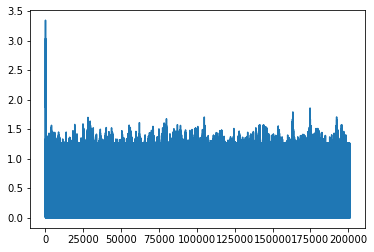

In [40]:
plt.plot(J2)